<a href="https://colab.research.google.com/github/hongqin/Use-R-in-CoLab/blob/master/Learn_R_through_analysis_of_Covid19_in_CoLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome
This is a short tutorial on using R to explore Covid19 data using Google CoLab <br>
Hong Qin <br>
Started on September 18, 2020. <br>
This is a work in progress and is for educational purpose only. 

This is code can be cloned from
https://github.com/hongqin/Use-R-in-CoLab/blob/master/Learn_R_through_analysis_of_Covid19_in_CoLab.ipynb 

More tutorials at http://YouTube.com/hongqin

# Warm up exercises

## Load libries

In [1]:
install.packages('reshape2')
library(tidyverse)
library(lubridate)
library(reshape2)
library(ggplot2)
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




## Simple calculator

In [2]:
2 + 4
pi
log10(pi)

[1] 6

[1] 3.141593

[1] 0.4971499

## Plots

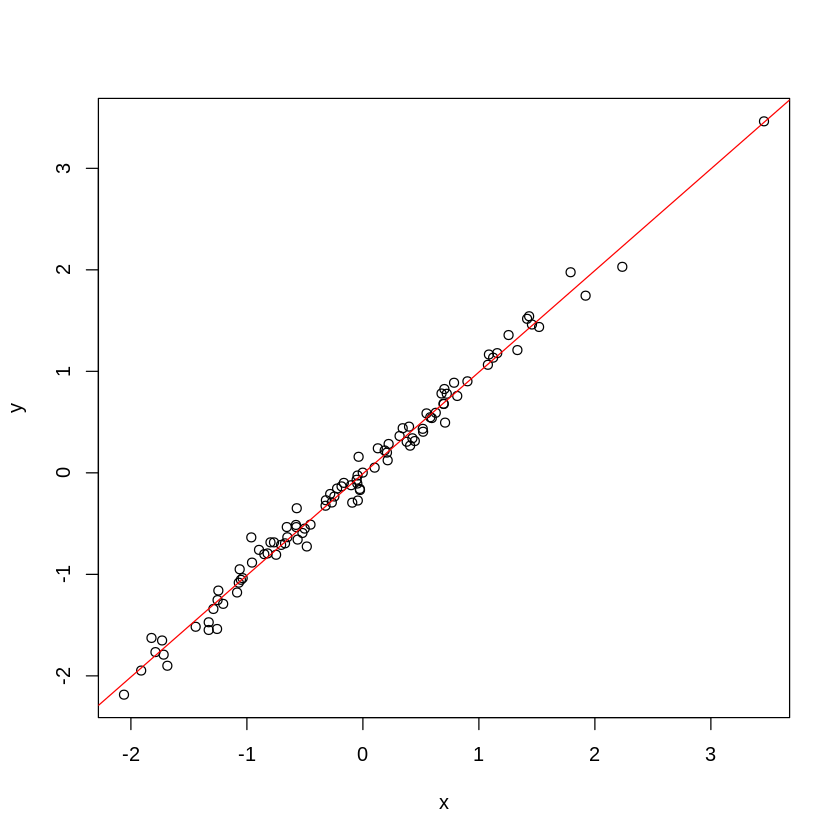

In [3]:
x = rnorm(100)
y = x + rnorm(100)/10
m = lm( y ~ x)
plot( y ~ x)
abline(m, col='red')

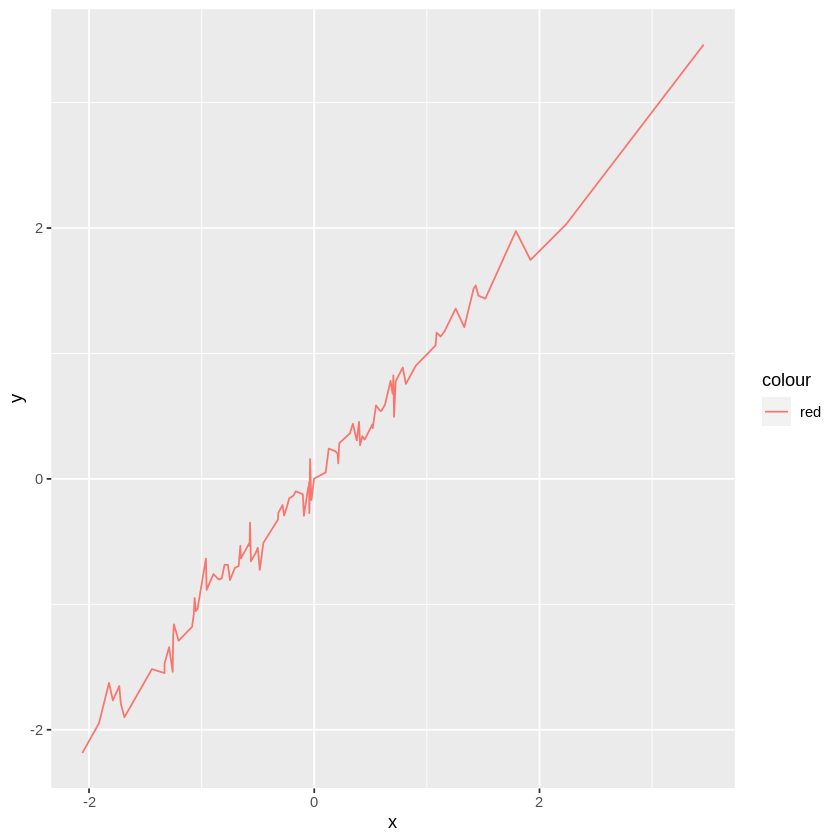

In [4]:
mydata = tibble(cbind(x,y))
ggplot(mydata, aes(x=x, y=y, col="red")) + geom_line()

## Looking for helps

In [5]:
?date

In [6]:
help(read_csv)

# Part 1, Explore the USA county-level data


We will go through basic R by exploring the Covid19 data set curated by the Johns Hopkins University. 




In [7]:

library(tidyverse)
library(ggplot2)
library(dplyr)

## Load data into DataFrames

In [8]:
# load JHU covid19 data set with tidyverse read_csv
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
#str(tb.jhu) #this is a tibble
head(tb)

Parsed with column specification:
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)

See spec(...) for full column specifications.



UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,⋯,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,⋯,1624,1664,1673,1690,1691,1714,1715,1738,1757,1764
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,⋯,5021,5033,5047,5061,5087,5124,5141,5165,5456,5477
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,⋯,809,824,830,835,838,848,851,857,873,882
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,⋯,617,619,628,632,636,635,638,642,652,654
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,⋯,1504,1527,1542,1551,1560,1573,1580,1594,1608,1611
84001011,US,USA,840,1011,Bullock,Alabama,US,32.10031,-85.71266,⋯,585,585,585,587,591,593,597,598,599,604


## Pick rows, columns, and cells in DataFrames

In [9]:
# pick first row
tb[1,] 

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,⋯,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,⋯,1624,1664,1673,1690,1691,1714,1715,1738,1757,1764


In [10]:
# pick first column and  first 10 rows
tb[ 1:10, 1]

UID
<dbl>
84001001
84001003
84001005
84001007
84001009
84001011
84001013
84001015
84001017


In [11]:
# The daily cases data started on the 12th column
tb[ 1:5, 1:12]

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,"Autauga, Alabama, US",0
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,"Baldwin, Alabama, US",0
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,"Barbour, Alabama, US",0
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,"Bibb, Alabama, US",0
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,"Blount, Alabama, US",0


In [12]:
# how many columns? 
length(tb[1,])
print(paste( "There are ", length(tb[1,]), " columns"))

[1] 260

[1] "There are  260  columns"


In [13]:
# view the first 5 rows in all data columns
tb[1:5 , 12:length(tb[1,])  ]

1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,1624,1664,1673,1690,1691,1714,1715,1738,1757,1764
0,0,0,0,0,0,0,0,0,0,⋯,5021,5033,5047,5061,5087,5124,5141,5165,5456,5477
0,0,0,0,0,0,0,0,0,0,⋯,809,824,830,835,838,848,851,857,873,882
0,0,0,0,0,0,0,0,0,0,⋯,617,619,628,632,636,635,638,642,652,654
0,0,0,0,0,0,0,0,0,0,⋯,1504,1527,1542,1551,1560,1573,1580,1594,1608,1611


## Select columns of daily cases

In [14]:
tb %>% dplyr::select( 12:length(tb[1,]) )


1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,1624,1664,1673,1690,1691,1714,1715,1738,1757,1764
0,0,0,0,0,0,0,0,0,0,⋯,5021,5033,5047,5061,5087,5124,5141,5165,5456,5477
0,0,0,0,0,0,0,0,0,0,⋯,809,824,830,835,838,848,851,857,873,882
0,0,0,0,0,0,0,0,0,0,⋯,617,619,628,632,636,635,638,642,652,654
0,0,0,0,0,0,0,0,0,0,⋯,1504,1527,1542,1551,1560,1573,1580,1594,1608,1611
0,0,0,0,0,0,0,0,0,0,⋯,585,585,585,587,591,593,597,598,599,604
0,0,0,0,0,0,0,0,0,0,⋯,902,906,908,909,911,911,911,913,916,912
0,0,0,0,0,0,0,0,0,0,⋯,3211,3249,3320,3338,3374,3390,3401,3466,3499,3515
0,0,0,0,0,0,0,0,0,0,⋯,1106,1117,1123,1130,1132,1140,1144,1151,1161,1164


## Convert daily cumulative values into rows

In [15]:
# this is fast but a bit un-intuitive
tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))
head(tb1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V3331,V3332,V3333,V3334,V3335,V3336,V3337,V3338,V3339,V3340
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1/22/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [16]:
#this is very slow due to installation
#install.packages('data.table')
##library(data.table)
#tb1b <- tb %>% select(12:length(tb[1,])) %>% transpose()
#tb1b

## Add meaning columns names

In [17]:
names(tb1) = tb$Combined_Key
head(tb1[100:110,1:10])

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4/30/20,44,174,39,42,37,13,53,94,295,15
5/1/20,42,175,42,42,39,14,65,93,290,15
5/2/20,45,181,43,42,40,14,92,98,294,15
5/3/20,48,187,45,43,40,14,105,105,300,16
5/4/20,53,188,45,42,40,16,114,105,302,16
5/5/20,53,189,47,43,40,18,120,114,304,17


## Convert dates from text format to actual Date type

see https://lubridate.tidyverse.org/ 

In [18]:
library(lubridate)
date("8/9/2020")

[1] "8-09-20"

In [19]:
current_dates = names(tb)[12:length(tb[1,])]
class(current_dates)
current_dates

[1] "character"

[1] "1/22/20" "1/23/20" "1/24/20" "1/25/20" "1/26/20" "1/27/20" "1/28/20"
  [8] "1/29/20" "1/30/20" "1/31/20" "2/1/20"  "2/2/20"  "2/3/20"  "2/4/20" 
 [15] "2/5/20"  "2/6/20"  "2/7/20"  "2/8/20"  "2/9/20"  "2/10/20" "2/11/20"
 [22] "2/12/20" "2/13/20" "2/14/20" "2/15/20" "2/16/20" "2/17/20" "2/18/20"
 [29] "2/19/20" "2/20/20" "2/21/20" "2/22/20" "2/23/20" "2/24/20" "2/25/20"
 [36] "2/26/20" "2/27/20" "2/28/20" "2/29/20" "3/1/20"  "3/2/20"  "3/3/20" 
 [43] "3/4/20"  "3/5/20"  "3/6/20"  "3/7/20"  "3/8/20"  "3/9/20"  "3/10/20"
 [50] "3/11/20" "3/12/20" "3/13/20" "3/14/20" "3/15/20" "3/16/20" "3/17/20"
 [57] "3/18/20" "3/19/20" "3/20/20" "3/21/20" "3/22/20" "3/23/20" "3/24/20"
 [64] "3/25/20" "3/26/20" "3/27/20" "3/28/20" "3/29/20" "3/30/20" "3/31/20"
 [71] "4/1/20"  "4/2/20"  "4/3/20"  "4/4/20"  "4/5/20"  "4/6/20"  "4/7/20" 
 [78] "4/8/20"  "4/9/20"  "4/10/20" "4/11/20" "4/12/20" "4/13/20" "4/14/20"
 [85] "4/15/20" "4/16/20" "4/17/20" "4/18/20" "4/19/20" "4/20/20" "4/21/20"
 [92] "4/22/20" "4/23/20" "4/24/20" "4/25/20" "4/26/20" "4/27/20" "4/28/20"
 [99] "4/29/20" "4/30/20" "5/1/20"  "5/2/20"  "5/3/20"  "5/4/20"  "5/5/20" 
[106] "5/6/20"  "5/7/20"  "5/8/20"  "5/9/20"  "5/10/20" "5/11/20" "5/12/20"
[113] "5/13/20" "5/14/20" "5/15/20" "5/16/20" "5/17/20" "5/18/20" "5/19/20"
[120] "5/20/20" "5/21/20" "5/22/20" "5/23/20" "5/24/20" "5/25/20" "5/26/20"
[127] "5/27/20" "5/28/20" "5/29/20" "5/30/20" "5/31/20" "6/1/20"  "6/2/20" 
[134] "6/3/20"  "6/4/20"  "6/5/20"  "6/6/20"  "6/7/20"  "6/8/20"  "6/9/20" 
[141] "6/10/20" "6/11/20" "6/12/20" "6/13/20" "6/14/20" "6/15/20" "6/16/20"
[148] "6/17/20" "6/18/20" "6/19/20" "6/20/20" "6/21/20" "6/22/20" "6/23/20"
[155] "6/24/20" "6/25/20" "6/26/20" "6/27/20" "6/28/20" "6/29/20" "6/30/20"
[162] "7/1/20"  "7/2/20"  "7/3/20"  "7/4/20"  "7/5/20"  "7/6/20"  "7/7/20" 
[169] "7/8/20"  "7/9/20"  "7/10/20" "7/11/20" "7/12/20" "7/13/20" "7/14/20"
[176] "7/15/20" "7/16/20" "7/17/20" "7/18/20" "7/19/20" "7/20/20" "7/21/20"
[183] "7/22/20" "7/23/20" "7/24/20" "7/25/20" "7/26/20" "7/27/20" "7/28/20"
[190] "7/29/20" "7/30/20" "7/31/20" "8/1/20"  "8/2/20"  "8/3/20"  "8/4/20" 
[197] "8/5/20"  "8/6/20"  "8/7/20"  "8/8/20"  "8/9/20"  "8/10/20" "8/11/20"
[204] "8/12/20" "8/13/20" "8/14/20" "8/15/20" "8/16/20" "8/17/20" "8/18/20"
[211] "8/19/20" "8/20/20" "8/21/20" "8/22/20" "8/23/20" "8/24/20" "8/25/20"
[218] "8/26/20" "8/27/20" "8/28/20" "8/29/20" "8/30/20" "8/31/20" "9/1/20" 
[225] "9/2/20"  "9/3/20"  "9/4/20"  "9/5/20"  "9/6/20"  "9/7/20"  "9/8/20" 
[232] "9/9/20"  "9/10/20" "9/11/20" "9/12/20" "9/13/20" "9/14/20" "9/15/20"
[239] "9/16/20" "9/17/20" "9/18/20" "9/19/20" "9/20/20" "9/21/20" "9/22/20"
[246] "9/23/20" "9/24/20" "9/25/20" "9/26/20"

In [20]:
mdy(current_dates[1:10])

[1] "2020-01-22" "2020-01-23" "2020-01-24" "2020-01-25" "2020-01-26"
 [6] "2020-01-27" "2020-01-28" "2020-01-29" "2020-01-30" "2020-01-31"

In [21]:
tb1$dates = mdy(current_dates)
head(tb1)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1/22/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-22
1/23/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-23
1/24/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-24
1/25/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-25
1/26/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-26
1/27/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-27


## Select a time window

In [22]:
tb1 %>% filter( dates > mdy("5/1/2020"), dates < mdy("5/31/20")) %>% head()

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
5/2/20,45,181,43,42,40,14,92,98,294,15,⋯,0,16,3,18,97,8,0,8,0,2020-05-02
5/3/20,48,187,45,43,40,14,105,105,300,16,⋯,0,16,3,18,98,8,0,8,0,2020-05-03
5/4/20,53,188,45,42,40,16,114,105,302,16,⋯,0,16,3,18,98,8,0,8,0,2020-05-04
5/5/20,53,189,47,43,40,18,120,114,304,17,⋯,0,16,3,18,98,8,0,8,0,2020-05-05
5/6/20,58,196,47,43,42,18,130,114,306,18,⋯,0,16,3,19,98,8,0,8,0,2020-05-06
5/7/20,61,205,51,44,44,18,155,120,308,18,⋯,0,16,3,19,98,8,0,8,0,2020-05-07


In [23]:
start = mdy("8/1/20")
start + ddays(14)

[1] "2020-08-15"

In [24]:
tb1 %>% dplyr::filter( dates >= start, dates <  start + ddays(14)) %>% dplyr::select(1:5)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8/1/20,988,3095,554,360,704
8/2/20,1010,3175,562,364,722
8/3/20,1024,3210,563,374,736
8/4/20,1030,3263,563,381,741
8/5/20,1030,3322,564,384,745
8/6/20,1050,3380,565,413,759
8/7/20,1065,3443,569,416,774
8/8/20,1086,3502,573,426,788
8/9/20,1169,3544,575,438,800


## Plot a time window

In [25]:
tb_sub <- 
 tb1 %>% dplyr::filter( dates >= start, dates <  start + ddays(14)) %>% dplyr::select( c(1:5), dates)

tb_sub

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
8/1/20,988,3095,554,360,704,2020-08-01
8/2/20,1010,3175,562,364,722,2020-08-02
8/3/20,1024,3210,563,374,736,2020-08-03
8/4/20,1030,3263,563,381,741,2020-08-04
8/5/20,1030,3322,564,384,745,2020-08-05
8/6/20,1050,3380,565,413,759,2020-08-06
8/7/20,1065,3443,569,416,774,2020-08-07
8/8/20,1086,3502,573,426,788,2020-08-08
8/9/20,1169,3544,575,438,800,2020-08-09


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



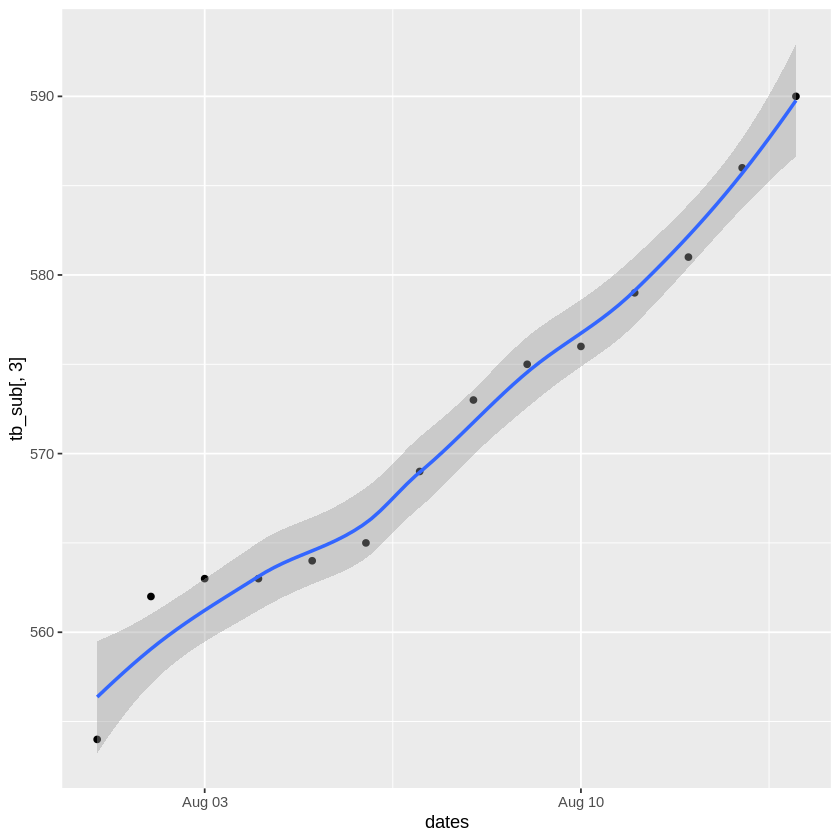

In [26]:
ggplot(tb_sub, aes( x = dates, y=tb_sub[,3])) + geom_point() + geom_smooth()

### Now, let's look a specific county. 
How about Hamilton, Tennessee, US?

There are many Hamilton counties in the USA

In [27]:
names(tb1)[ grep("Hamilton", colnames(tb1))]

[1] "Hamilton, Florida, US"   "Hamilton, Illinois, US" 
 [3] "Hamilton, Indiana, US"   "Hamilton, Iowa, US"     
 [5] "Hamilton, Kansas, US"    "Hamilton, Nebraska, US" 
 [7] "Hamilton, New York, US"  "Hamilton, Ohio, US"     
 [9] "Hamilton, Tennessee, US" "Hamilton, Texas, US"

In [28]:
print(paste("There are ", length(names(tb1)[ grep("Hamilton", colnames(tb1))] ), " Hamilton counties in the USA"))

[1] "There are  10  Hamilton counties in the USA"


In [29]:
tb1 %>% dplyr::select ( c('Hamilton, Tennessee, US', 'dates'))

,"Hamilton, Tennessee, US",dates
,<dbl>,<date>
1/22/20,0,2020-01-22
1/23/20,0,2020-01-23
1/24/20,0,2020-01-24
1/25/20,0,2020-01-25
1/26/20,0,2020-01-26
1/27/20,0,2020-01-27
1/28/20,0,2020-01-28
1/29/20,0,2020-01-29
1/30/20,0,2020-01-30


In [30]:
tb_HCTN <-  tb1 %>% 
  dplyr::select ( c('Hamilton, Tennessee, US', 'dates')) %>%
  dplyr::filter( between(dates, mdy('5/1/20'), mdy('9/17/20')))

head(tb_HCTN)

,"Hamilton, Tennessee, US",dates
,<dbl>,<date>
5/1/20,160,2020-05-01
5/2/20,168,2020-05-02
5/3/20,172,2020-05-03
5/4/20,180,2020-05-04
5/5/20,184,2020-05-05
5/6/20,196,2020-05-06


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



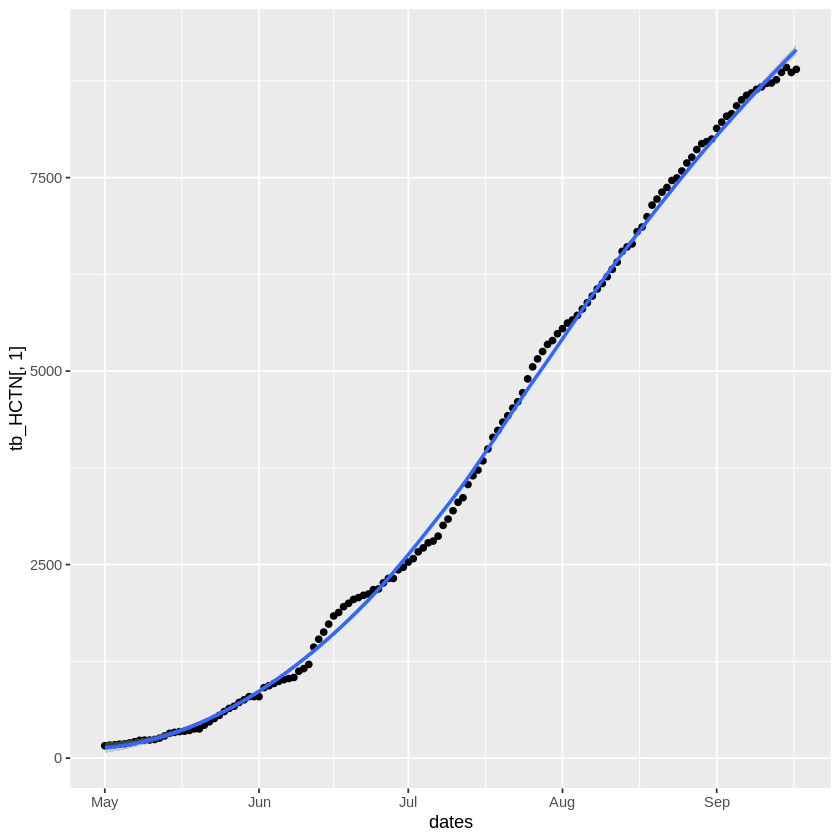

In [31]:
ggplot(tb_HCTN, aes( x = dates, y=tb_HCTN[,1])) + geom_point() + geom_smooth()

## Multiple column plot
How to compare different counties?

In [32]:
names(tb1)[ grep("Tennessee", colnames(tb1))]

[1] "Anderson, Tennessee, US"   "Bedford, Tennessee, US"   
 [3] "Benton, Tennessee, US"     "Bledsoe, Tennessee, US"   
 [5] "Blount, Tennessee, US"     "Bradley, Tennessee, US"   
 [7] "Campbell, Tennessee, US"   "Cannon, Tennessee, US"    
 [9] "Carroll, Tennessee, US"    "Carter, Tennessee, US"    
[11] "Cheatham, Tennessee, US"   "Chester, Tennessee, US"   
[13] "Claiborne, Tennessee, US"  "Clay, Tennessee, US"      
[15] "Cocke, Tennessee, US"      "Coffee, Tennessee, US"    
[17] "Crockett, Tennessee, US"   "Cumberland, Tennessee, US"
[19] "Davidson, Tennessee, US"   "DeKalb,Tennessee,US"      
[21] "Decatur, Tennessee, US"    "Dickson, Tennessee, US"   
[23] "Dyer, Tennessee, US"       "Fayette, Tennessee, US"   
[25] "Fentress, Tennessee, US"   "Franklin, Tennessee, US"  
[27] "Gibson, Tennessee, US"     "Giles, Tennessee, US"     
[29] "Grainger, Tennessee, US"   "Greene, Tennessee, US"    
[31] "Grundy, Tennessee, US"     "Hamblen, Tennessee, US"   
[33] "Hamilton, Tennessee, US"   "Hancock, Tennessee, US"   
[35] "Hardeman, Tennessee, US"   "Hardin, Tennessee, US"    
[37] "Hawkins, Tennessee, US"    "Haywood, Tennessee, US"   
[39] "Henderson, Tennessee, US"  "Henry, Tennessee, US"     
[41] "Hickman, Tennessee, US"    "Houston, Tennessee, US"   
[43] "Humphreys, Tennessee, US"  "Jackson, Tennessee, US"   
[45] "Jefferson, Tennessee, US"  "Johnson, Tennessee, US"   
[47] "Knox, Tennessee, US"       "Lake, Tennessee, US"      
[49] "Lauderdale, Tennessee, US" "Lawrence, Tennessee, US"  
[51] "Lewis, Tennessee, US"      "Lincoln, Tennessee, US"   
[53] "Loudon, Tennessee, US"     "Macon, Tennessee, US"     
[55] "Madison, Tennessee, US"    "Marion, Tennessee, US"    
[57] "Marshall, Tennessee, US"   "Maury, Tennessee, US"     
[59] "McMinn, Tennessee, US"     "McNairy, Tennessee, US"   
[61] "Meigs, Tennessee, US"      "Monroe, Tennessee, US"    
[63] "Montgomery, Tennessee, US" "Moore, Tennessee, US"     
[65] "Morgan, Tennessee, US"     "Obion, Tennessee, US"     
[67] "Out of TN, Tennessee, US"  "Overton, Tennessee, US"   
[69] "Perry, Tennessee, US"      "Pickett, Tennessee, US"   
[71] "Polk, Tennessee, US"       "Putnam, Tennessee, US"    
[73] "Rhea, Tennessee, US"       "Roane, Tennessee, US"     
[75] "Robertson, Tennessee, US"  "Rutherford, Tennessee, US"
[77] "Scott, Tennessee, US"      "Sequatchie, Tennessee, US"
[79] "Sevier, Tennessee, US"     "Shelby, Tennessee, US"    
[81] "Smith, Tennessee, US"      "Stewart, Tennessee, US"   
[83] "Sullivan, Tennessee, US"   "Sumner, Tennessee, US"    
[85] "Tipton, Tennessee, US"     "Trousdale, Tennessee, US" 
[87] "Unassigned, Tennessee, US" "Unicoi, Tennessee, US"    
[89] "Union, Tennessee, US"      "Van Buren, Tennessee, US" 
[91] "Warren, Tennessee, US"     "Washington, Tennessee, US"
[93] "Wayne, Tennessee, US"      "Weakley, Tennessee, US"   
[95] "White, Tennessee, US"      "Williamson, Tennessee, US"
[97] "Wilson, Tennessee, US"

In [33]:
print(paste("There are ", length( names(tb1)[ grep("Tennessee", colnames(tb1))])  ," counties in Tennessee. Really?"))

[1] "There are  97  counties in Tennessee. Really?"


In [34]:
mycounties = c( 'Hamilton, Tennessee, US', 'Knox, Tennessee, US')

days_window = 90 #90-day window
endday = '9/18/20'

tb_sub <- tb1 %>% 
  dplyr::select( all_of(mycounties), 'dates') %>%
  dplyr::filter( between(dates, mdy(endday)-ddays(days_window), mdy(endday)))   

head(tb_sub)


,"Hamilton, Tennessee, US","Knox, Tennessee, US",dates
,<dbl>,<dbl>,<date>
6/20/20,2050,638,2020-06-20
6/21/20,2074,656,2020-06-21
6/22/20,2103,693,2020-06-22
6/23/20,2120,716,2020-06-23
6/24/20,2176,740,2020-06-24
6/25/20,2185,783,2020-06-25


In [35]:
library(reshape2)
df_tmp <- melt(tb_sub, measure.vars = mycounties, value.name = 'DailyCases', variable.name = 'Counties')
head(df_tmp)

,dates,Counties,DailyCases
,<date>,<fct>,<dbl>
1,2020-06-20,"Hamilton, Tennessee, US",2050
2,2020-06-21,"Hamilton, Tennessee, US",2074
3,2020-06-22,"Hamilton, Tennessee, US",2103
4,2020-06-23,"Hamilton, Tennessee, US",2120
5,2020-06-24,"Hamilton, Tennessee, US",2176
6,2020-06-25,"Hamilton, Tennessee, US",2185


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



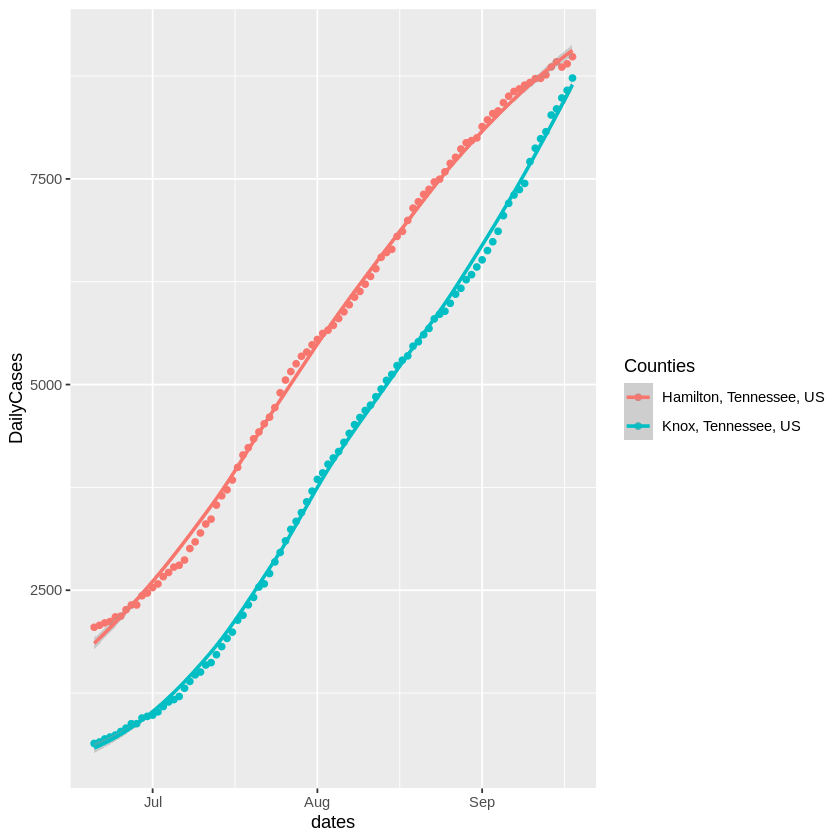

In [36]:
ggplot( df_tmp, aes(x=dates, y=DailyCases, color=Counties) ) + geom_point() + geom_smooth()

# Part 2, Explore the USA state-level data

Group by states

## Convert the county-level time series data to state-level data 

In [37]:
tb0 = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
#str(tb.jhu) #this is a tibble
head(tb0)

Parsed with column specification:
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)

See spec(...) for full column specifications.



UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,⋯,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,⋯,1624,1664,1673,1690,1691,1714,1715,1738,1757,1764
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,⋯,5021,5033,5047,5061,5087,5124,5141,5165,5456,5477
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,⋯,809,824,830,835,838,848,851,857,873,882
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,⋯,617,619,628,632,636,635,638,642,652,654
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,⋯,1504,1527,1542,1551,1560,1573,1580,1594,1608,1611
84001011,US,USA,840,1011,Bullock,Alabama,US,32.10031,-85.71266,⋯,585,585,585,587,591,593,597,598,599,604


In [38]:
tb1 = tb0[, c(7, 50:length(tb[1,])) ]

tb2 <- tb1 %>%
  group_by(Province_State) %>%
  summarize_if(is.numeric, sum,na.rm=TRUE)

tb2

Province_State,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,⋯,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,0,0,0,0,0,0,0,0,0,⋯,141757,142863,144164,144962,145780,146584,147153,148206,150658,151591
Alaska,0,0,0,0,0,0,0,0,0,⋯,6537,6644,6729,6822,6892,6936,7004,7132,7254,7367
American Samoa,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Arizona,1,1,1,1,1,1,2,4,4,⋯,211660,212942,213551,214021,214251,214846,215284,215852,216367,216826
Arkansas,0,0,0,0,0,0,0,0,0,⋯,73211,74082,75160,75723,76364,76981,77963,79049,79946,80755
California,12,12,21,25,35,51,59,81,95,⋯,775037,779491,783313,786168,790096,793065,796436,799516,803660,807451
Colorado,0,0,0,0,0,2,8,8,8,⋯,63125,63730,64336,64837,65379,66033,66649,67196,67905,68489
Connecticut,0,0,0,0,0,0,0,0,0,⋯,55386,55527,55527,55527,56024,56160,56315,56472,56587,56587
Delaware,0,0,0,0,0,0,0,0,0,⋯,19318,19366,19449,19566,19667,19761,19830,19947,20085,20156


## Covert cumulative counts into daily cases

### First, do a few tests on simple data sets to make sure that we know what we are doing.

In [39]:
? apply

In [40]:
? diff

In [41]:
x = data.frame(1:10)
apply(x, 2, diff)

X1.10
1
1
1
1
1
1
1
1
1


In [42]:
y = data.frame(10:1)
apply(y, 2, diff)

X10.1
-1
-1
-1
-1
-1
-1
-1
-1
-1


### Now, process a small data set to verify the results

In [44]:
test = tb2[1:5, 10:20]
test

3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,5,7,11,29,39,51
0,0,0,0,0,1,1,1,1,3,5
0,0,0,0,0,0,0,0,0,0,0
4,4,6,9,9,9,12,12,18,20,27
0,0,0,0,0,9,12,3,3,3,4


In [45]:
apply( test, 1, diff)

3/9/20,0,0,0,0,0
3/10/20,0,0,0,2,0
3/11/20,0,0,0,3,0
3/12/20,0,0,0,0,0
3/13/20,5,1,0,0,9
3/14/20,2,0,0,3,3
3/15/20,4,0,0,0,-9
3/16/20,18,0,0,6,0
3/17/20,10,2,0,2,0
3/18/20,12,2,0,7,1


### Now, we are comfortable to apply our method to the entire data set. 

In [46]:
tb3 = apply(tb2[, 2:length(tb2[1,])], 1, diff)
tb3= data.frame(tb3)
head(tb3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3/1/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,4,0,0,0
3/2/20,0,0,0,0,0,9,0,0,0,0,⋯,0,0,0,0,0,0,7,0,0,0
3/3/20,0,0,0,0,0,4,0,0,0,0,⋯,0,0,0,0,0,0,9,0,0,0
3/4/20,0,0,0,0,0,10,0,0,0,0,⋯,0,0,0,0,0,0,12,0,0,0
3/5/20,0,0,0,0,0,16,2,0,0,0,⋯,1,3,0,0,0,0,31,0,0,0
3/6/20,0,0,0,1,0,8,6,0,0,0,⋯,0,1,0,0,0,0,8,0,0,0


## Add states names as columns names

Current names are not informative

In [47]:
names(tb3)

[1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X8"  "X9"  "X10" "X11" "X12"
[13] "X13" "X14" "X15" "X16" "X17" "X18" "X19" "X20" "X21" "X22" "X23" "X24"
[25] "X25" "X26" "X27" "X28" "X29" "X30" "X31" "X32" "X33" "X34" "X35" "X36"
[37] "X37" "X38" "X39" "X40" "X41" "X42" "X43" "X44" "X45" "X46" "X47" "X48"
[49] "X49" "X50" "X51" "X52" "X53" "X54" "X55" "X56" "X57" "X58"

Information of States will be more relevant.

In [48]:
tb2$Province_State

[1] "Alabama"                  "Alaska"                  
 [3] "American Samoa"           "Arizona"                 
 [5] "Arkansas"                 "California"              
 [7] "Colorado"                 "Connecticut"             
 [9] "Delaware"                 "Diamond Princess"        
[11] "District of Columbia"     "Florida"                 
[13] "Georgia"                  "Grand Princess"          
[15] "Guam"                     "Hawaii"                  
[17] "Idaho"                    "Illinois"                
[19] "Indiana"                  "Iowa"                    
[21] "Kansas"                   "Kentucky"                
[23] "Louisiana"                "Maine"                   
[25] "Maryland"                 "Massachusetts"           
[27] "Michigan"                 "Minnesota"               
[29] "Mississippi"              "Missouri"                
[31] "Montana"                  "Nebraska"                
[33] "Nevada"                   "New Hampshire"           
[35] "New Jersey"               "New Mexico"              
[37] "New York"                 "North Carolina"          
[39] "North Dakota"             "Northern Mariana Islands"
[41] "Ohio"                     "Oklahoma"                
[43] "Oregon"                   "Pennsylvania"            
[45] "Puerto Rico"              "Rhode Island"            
[47] "South Carolina"           "South Dakota"            
[49] "Tennessee"                "Texas"                   
[51] "Utah"                     "Vermont"                 
[53] "Virgin Islands"           "Virginia"                
[55] "Washington"               "West Virginia"           
[57] "Wisconsin"                "Wyoming"

Assign the columns names with the State-names

In [49]:
names(tb3) = tb2$Province_State
head(tb3)

,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,⋯,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3/1/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,4,0,0,0
3/2/20,0,0,0,0,0,9,0,0,0,0,⋯,0,0,0,0,0,0,7,0,0,0
3/3/20,0,0,0,0,0,4,0,0,0,0,⋯,0,0,0,0,0,0,9,0,0,0
3/4/20,0,0,0,0,0,10,0,0,0,0,⋯,0,0,0,0,0,0,12,0,0,0
3/5/20,0,0,0,0,0,16,2,0,0,0,⋯,1,3,0,0,0,0,31,0,0,0
3/6/20,0,0,0,1,0,8,6,0,0,0,⋯,0,1,0,0,0,0,8,0,0,0


## Convert date-text to Date type

In [50]:
row.names(tb3)

[1] "3/1/20"  "3/2/20"  "3/3/20"  "3/4/20"  "3/5/20"  "3/6/20"  "3/7/20" 
  [8] "3/8/20"  "3/9/20"  "3/10/20" "3/11/20" "3/12/20" "3/13/20" "3/14/20"
 [15] "3/15/20" "3/16/20" "3/17/20" "3/18/20" "3/19/20" "3/20/20" "3/21/20"
 [22] "3/22/20" "3/23/20" "3/24/20" "3/25/20" "3/26/20" "3/27/20" "3/28/20"
 [29] "3/29/20" "3/30/20" "3/31/20" "4/1/20"  "4/2/20"  "4/3/20"  "4/4/20" 
 [36] "4/5/20"  "4/6/20"  "4/7/20"  "4/8/20"  "4/9/20"  "4/10/20" "4/11/20"
 [43] "4/12/20" "4/13/20" "4/14/20" "4/15/20" "4/16/20" "4/17/20" "4/18/20"
 [50] "4/19/20" "4/20/20" "4/21/20" "4/22/20" "4/23/20" "4/24/20" "4/25/20"
 [57] "4/26/20" "4/27/20" "4/28/20" "4/29/20" "4/30/20" "5/1/20"  "5/2/20" 
 [64] "5/3/20"  "5/4/20"  "5/5/20"  "5/6/20"  "5/7/20"  "5/8/20"  "5/9/20" 
 [71] "5/10/20" "5/11/20" "5/12/20" "5/13/20" "5/14/20" "5/15/20" "5/16/20"
 [78] "5/17/20" "5/18/20" "5/19/20" "5/20/20" "5/21/20" "5/22/20" "5/23/20"
 [85] "5/24/20" "5/25/20" "5/26/20" "5/27/20" "5/28/20" "5/29/20" "5/30/20"
 [92] "5/31/20" "6/1/20"  "6/2/20"  "6/3/20"  "6/4/20"  "6/5/20"  "6/6/20" 
 [99] "6/7/20"  "6/8/20"  "6/9/20"  "6/10/20" "6/11/20" "6/12/20" "6/13/20"
[106] "6/14/20" "6/15/20" "6/16/20" "6/17/20" "6/18/20" "6/19/20" "6/20/20"
[113] "6/21/20" "6/22/20" "6/23/20" "6/24/20" "6/25/20" "6/26/20" "6/27/20"
[120] "6/28/20" "6/29/20" "6/30/20" "7/1/20"  "7/2/20"  "7/3/20"  "7/4/20" 
[127] "7/5/20"  "7/6/20"  "7/7/20"  "7/8/20"  "7/9/20"  "7/10/20" "7/11/20"
[134] "7/12/20" "7/13/20" "7/14/20" "7/15/20" "7/16/20" "7/17/20" "7/18/20"
[141] "7/19/20" "7/20/20" "7/21/20" "7/22/20" "7/23/20" "7/24/20" "7/25/20"
[148] "7/26/20" "7/27/20" "7/28/20" "7/29/20" "7/30/20" "7/31/20" "8/1/20" 
[155] "8/2/20"  "8/3/20"  "8/4/20"  "8/5/20"  "8/6/20"  "8/7/20"  "8/8/20" 
[162] "8/9/20"  "8/10/20" "8/11/20" "8/12/20" "8/13/20" "8/14/20" "8/15/20"
[169] "8/16/20" "8/17/20" "8/18/20" "8/19/20" "8/20/20" "8/21/20" "8/22/20"
[176] "8/23/20" "8/24/20" "8/25/20" "8/26/20" "8/27/20" "8/28/20" "8/29/20"
[183] "8/30/20" "8/31/20" "9/1/20"  "9/2/20"  "9/3/20"  "9/4/20"  "9/5/20" 
[190] "9/6/20"  "9/7/20"  "9/8/20"  "9/9/20"  "9/10/20" "9/11/20" "9/12/20"
[197] "9/13/20" "9/14/20" "9/15/20" "9/16/20" "9/17/20" "9/18/20" "9/19/20"
[204] "9/20/20" "9/21/20" "9/22/20" "9/23/20" "9/24/20" "9/25/20" "9/26/20"

In [51]:
tb3$dates = mdy(row.names(tb3))
head(tb3)

,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,⋯,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
3/1/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,4,0,0,0,2020-03-01
3/2/20,0,0,0,0,0,9,0,0,0,0,⋯,0,0,0,0,0,7,0,0,0,2020-03-02
3/3/20,0,0,0,0,0,4,0,0,0,0,⋯,0,0,0,0,0,9,0,0,0,2020-03-03
3/4/20,0,0,0,0,0,10,0,0,0,0,⋯,0,0,0,0,0,12,0,0,0,2020-03-04
3/5/20,0,0,0,0,0,16,2,0,0,0,⋯,3,0,0,0,0,31,0,0,0,2020-03-05
3/6/20,0,0,0,1,0,8,6,0,0,0,⋯,1,0,0,0,0,8,0,0,0,2020-03-06


## Plot

In [52]:
tb3[,2]

[1]   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   2   2
 [19]   3   3   2   5  12   4   7  15   2  27  17  12   5  13  11  14  14  14
 [37]   5  23  13   9  11  11  15   5   8   8   7   9   5   5   2   8   6   2
 [55]   2   0   1   5   6   4   0   9   1   3   2   1   1   2   3   1   1   0
 [73]   4   0   0   5   0   0   0  12   1   0   2   4   0   1   2   1  13   5
 [91]   4  26   7  20  18   8  11  12   8  19  10  20  17  15  29   7   3  12
[109]  20  12  13  21  11   6   2  29  24  20  18  29  21  36  38  39  46  47
[127]  27  28  18  42  46  55  62  94  60  40  52  62  41  62  79  75  92  89
[145]  62  56  90 186  98 107  68  81 111 146 144  61  53  54  35  53  77  98
[163]  63  45  60  84 110  83 103  50  62  67  82  68  89  64  69  33  52  79
[181] 118  90  44  37  34  65 102 120  93  83  33  35  63 121  92 103  61  75
[199]  41  48 105 107  85  93  70  44  68 128 122 113

### A line plot

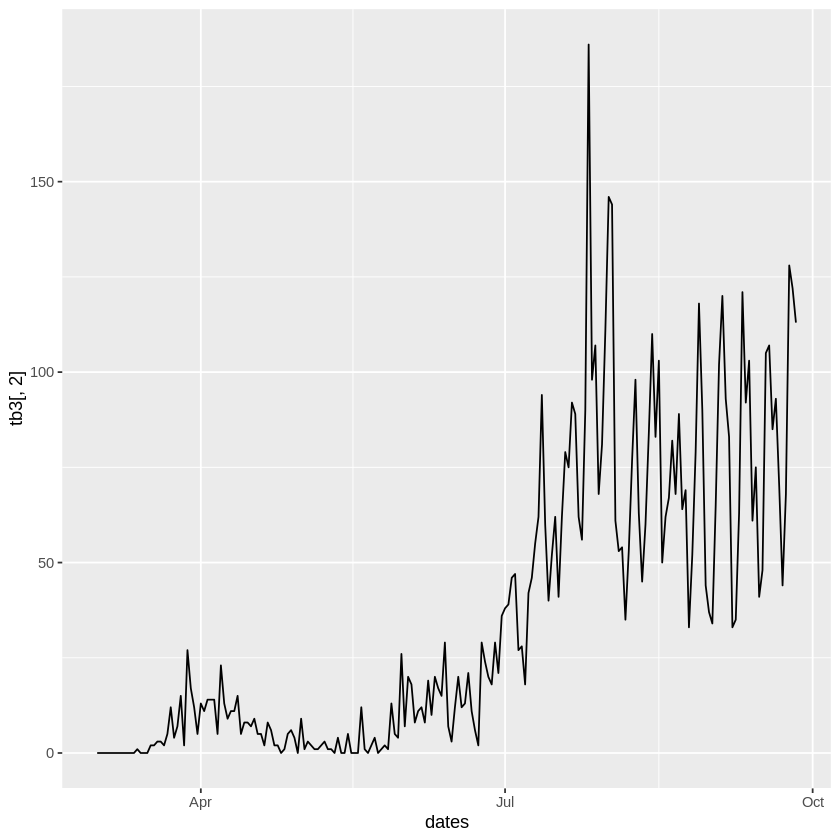

In [53]:
ggplot(tb3, aes(x=dates, y=tb3[,2])) + geom_line()


### A scatter plot with smoothing trend

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



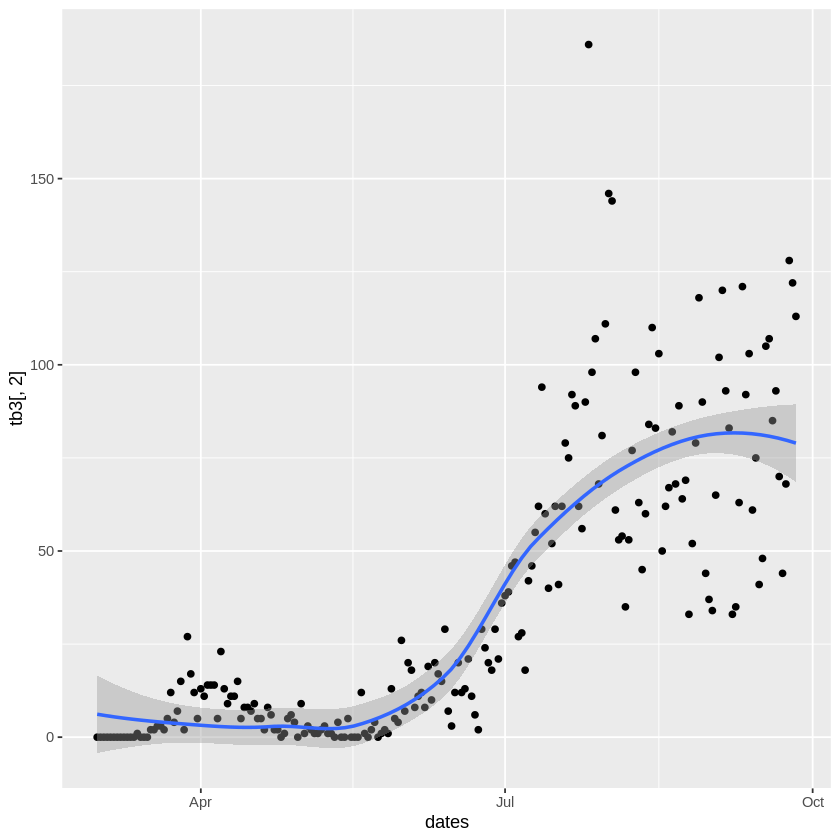

In [54]:
ggplot(tb3, aes(x=dates, y=tb3[,2])) + geom_point() + geom_smooth()


### Plot for a time-window

In [55]:
#end = mdy("5/1/20")
end = today(tzone='EST') - 1
end

[1] "2020-09-26"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



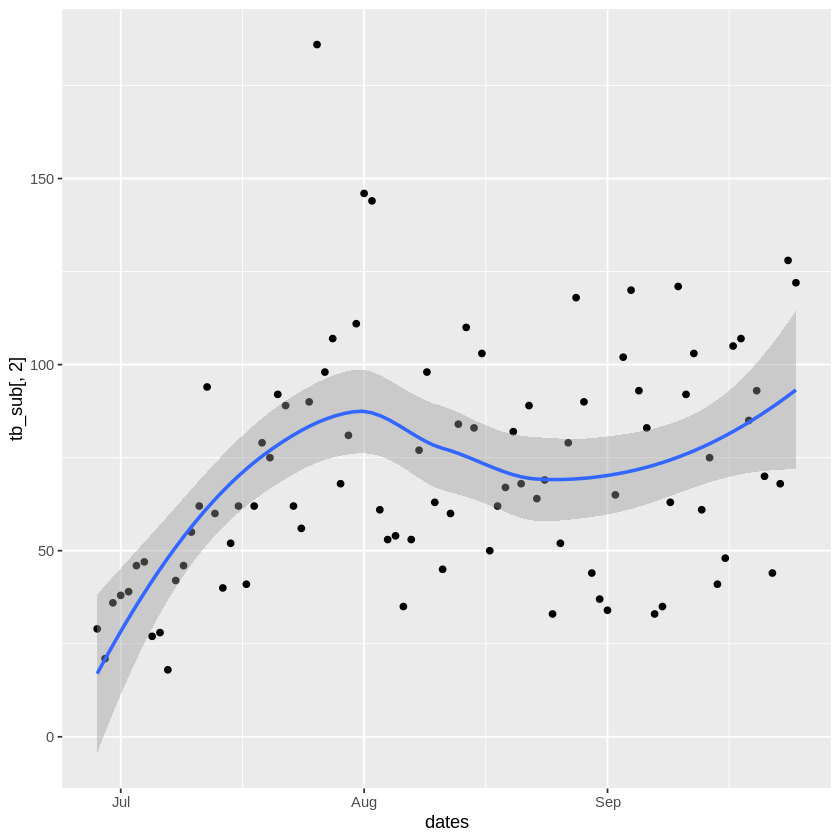

In [56]:
tb_sub <- 
 tb3 %>% filter( dates >= end- ddays(90), dates <  end) #This is 90 day window

ggplot(tb_sub, aes(x=dates, y=tb_sub[,2])) + geom_point() + geom_smooth()


### Let's look a specific State. 
How about Tennessee? 

In [57]:
names(tb3)

[1] "Alabama"                  "Alaska"                  
 [3] "American Samoa"           "Arizona"                 
 [5] "Arkansas"                 "California"              
 [7] "Colorado"                 "Connecticut"             
 [9] "Delaware"                 "Diamond Princess"        
[11] "District of Columbia"     "Florida"                 
[13] "Georgia"                  "Grand Princess"          
[15] "Guam"                     "Hawaii"                  
[17] "Idaho"                    "Illinois"                
[19] "Indiana"                  "Iowa"                    
[21] "Kansas"                   "Kentucky"                
[23] "Louisiana"                "Maine"                   
[25] "Maryland"                 "Massachusetts"           
[27] "Michigan"                 "Minnesota"               
[29] "Mississippi"              "Missouri"                
[31] "Montana"                  "Nebraska"                
[33] "Nevada"                   "New Hampshire"           
[35] "New Jersey"               "New Mexico"              
[37] "New York"                 "North Carolina"          
[39] "North Dakota"             "Northern Mariana Islands"
[41] "Ohio"                     "Oklahoma"                
[43] "Oregon"                   "Pennsylvania"            
[45] "Puerto Rico"              "Rhode Island"            
[47] "South Carolina"           "South Dakota"            
[49] "Tennessee"                "Texas"                   
[51] "Utah"                     "Vermont"                 
[53] "Virgin Islands"           "Virginia"                
[55] "Washington"               "West Virginia"           
[57] "Wisconsin"                "Wyoming"                 
[59] "dates"

In [138]:
days_window = 90 #90-day window
endday = today(tzone = 'EST')

tb_TN <- tb3 %>% 
  dplyr::select( 'Tennessee', 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday)) 

In [140]:
head(tb_TN)

,Tennessee,dates
,<dbl>,<date>
6/29/20,2125,2020-06-29
6/30/20,1212,2020-06-30
7/1/20,1806,2020-07-01
7/2/20,1575,2020-07-02
7/3/20,1822,2020-07-03
7/4/20,1428,2020-07-04


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



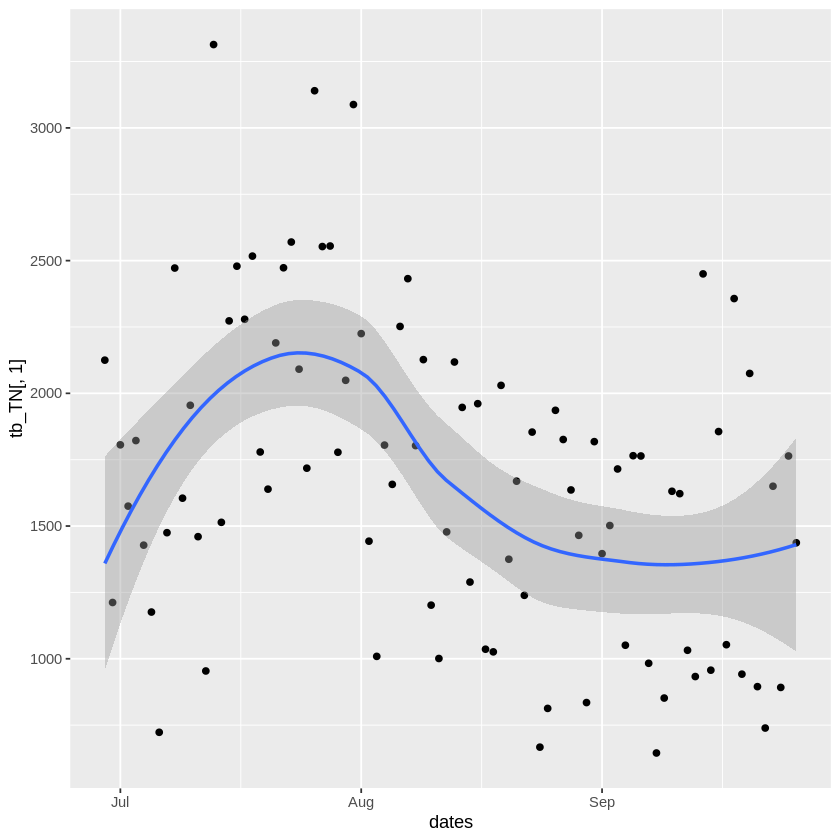

In [141]:
ggplot(tb_TN, aes(x=dates, y=tb_TN[,1])) + geom_point() + geom_smooth()

### Multiple plots to compare two states

In [142]:
days_window = 90 #90-day window
endday = today(tzone='Est') -1

tb_2States <- tb3 %>% 
  dplyr::select( 'Tennessee','Georgia', 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_2States)

Warning message in with_tz(Sys.time(), tzone):
“Unrecognized time zone 'Est'”


,Tennessee,Georgia,dates
,<dbl>,<dbl>,<date>
6/29/20,2125,2207,2020-06-29
6/30/20,1212,1874,2020-06-30
7/1/20,1806,2951,2020-07-01
7/2/20,1575,3467,2020-07-02
7/3/20,1822,2784,2020-07-03
7/4/20,1428,2826,2020-07-04


In [143]:
library(reshape2)

In [144]:
df_tmp <- melt(tb_2States, measure.vars = c('Tennessee', 'Georgia'))
head(df_tmp)

,dates,variable,value
,<date>,<fct>,<dbl>
1,2020-06-29,Tennessee,2125
2,2020-06-30,Tennessee,1212
3,2020-07-01,Tennessee,1806
4,2020-07-02,Tennessee,1575
5,2020-07-03,Tennessee,1822
6,2020-07-04,Tennessee,1428


In [145]:
names(df_tmp) = c("dates", "State", "DailyCases")
head(df_tmp)

,dates,State,DailyCases
,<date>,<fct>,<dbl>
1,2020-06-29,Tennessee,2125
2,2020-06-30,Tennessee,1212
3,2020-07-01,Tennessee,1806
4,2020-07-02,Tennessee,1575
5,2020-07-03,Tennessee,1822
6,2020-07-04,Tennessee,1428


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



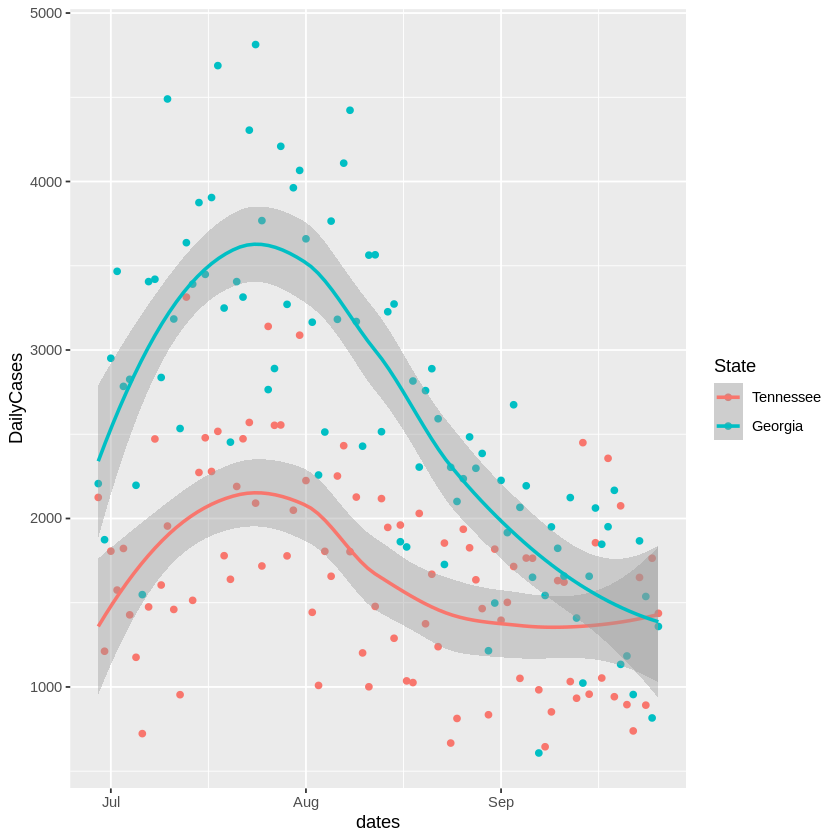

In [146]:
ggplot(df_tmp, aes(x=dates, y=DailyCases, color=State)) + geom_point() + geom_smooth()

### How about more than two states? 

In [147]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 90 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)


,Tennessee,Georgia,Alabama,Florida,dates
,<dbl>,<dbl>,<dbl>,<dbl>,<date>
6/28/20,0,2225,358,8530,2020-06-28
6/29/20,2125,2207,1734,5266,2020-06-29
6/30/20,1212,1874,870,6093,2020-06-30
7/1/20,1806,2951,917,6563,2020-07-01
7/2/20,1575,3467,1149,10109,2020-07-02
7/3/20,1822,2784,1754,9488,2020-07-03


In [148]:
df_tmp <- melt(tb_sub, measure.vars = mystates, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

,dates,State,DailyCases
,<date>,<fct>,<dbl>
1,2020-06-28,Tennessee,0
2,2020-06-29,Tennessee,2125
3,2020-06-30,Tennessee,1212
4,2020-07-01,Tennessee,1806
5,2020-07-02,Tennessee,1575
6,2020-07-03,Tennessee,1822


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”


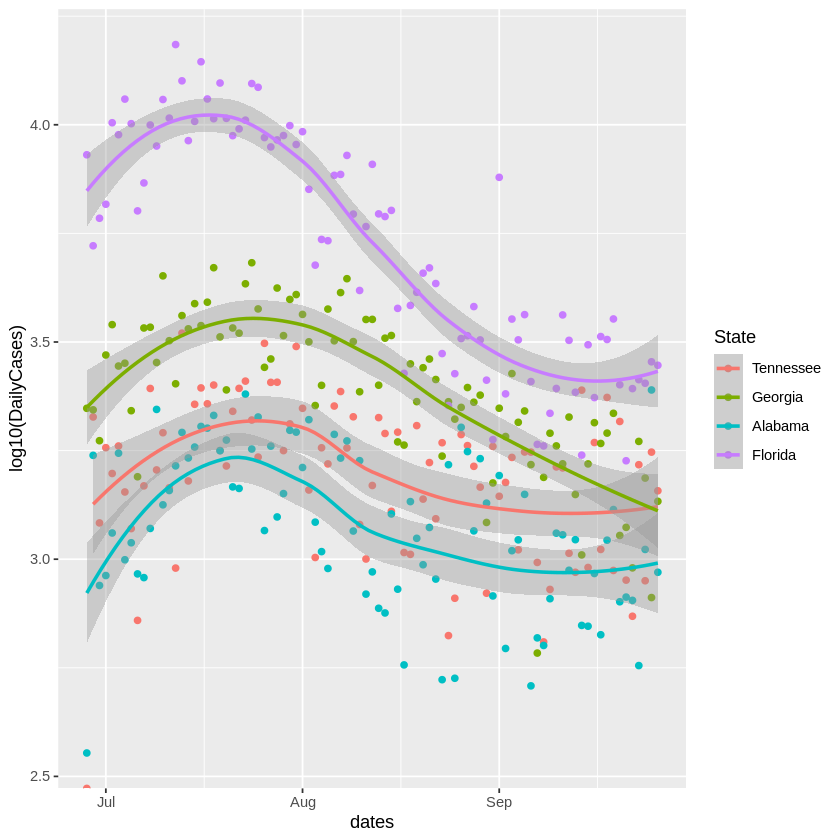

In [149]:
ggplot(df_tmp, aes(x=dates, y=log10(DailyCases), color=State)) + geom_point() + geom_smooth() 

# Part 3. Transmission analysis

### Study the Germany 1918 exampel

In [150]:
install.packages('R0', lib = '/content')
#library('R0')
library("R0", lib.loc="/content")

In [70]:
help(package='R0')

In [71]:
data(Germany.1918)
head(Germany.1918)

1918-09-29 1918-09-30 1918-10-01 1918-10-02 1918-10-03 1918-10-04 
        10          4          4         19          6         13

In [72]:
str(Germany.1918)

 Named num [1:126] 10 4 4 19 6 13 28 23 35 27 ...
 - attr(*, "names")= chr [1:126] "1918-09-29" "1918-09-30" "1918-10-01" "1918-10-02" ...


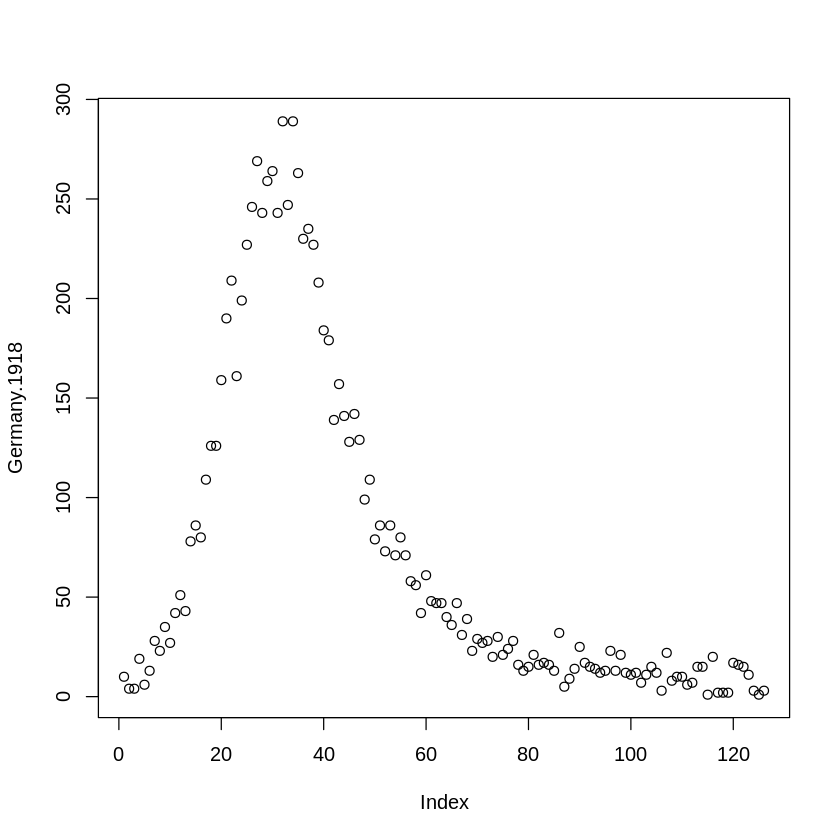

In [73]:
plot(Germany.1918)


e.R0.T> #Loading package
e.R0.T> library(R0)

e.R0.T> ## Data is taken from the paper by Nishiura for key transmission parameters of an institutional
e.R0.T> ## outbreak during 1918 influenza pandemic in Germany)
e.R0.T> 
e.R0.T> data(Germany.1918)

e.R0.T> mGT<-generation.time("gamma", c(3, 1.5))

e.R0.T> TD <- est.R0.TD(Germany.1918, mGT, begin=1, end=126, nsim=100)


Warning message in est.R0.TD(Germany.1918, mGT, begin = 1, end = 126, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(Germany.1918, mGT, begin = 1, end = 126, nsim = 100):
“Using initial incidence as initial number of cases.”



e.R0.T> # Warning messages:
e.R0.T> # 1: In est.R0.TD(Germany.1918, mGT) : Simulations may take several minutes.
e.R0.T> # 2: In est.R0.TD(Germany.1918, mGT) : Using initial incidence as initial number of cases.
e.R0.T> TD
Reproduction number estimate using  Time-Dependent  method.
2.322239 2.272013 1.998474 1.843703 2.019297 1.867488 1.644993 1.553265 1.553317 1.601317 ...


e.R0.T> # Reproduction number estimate using  Time-Dependent  method.
e.R0.T> # 2.322239 2.272013 1.998474 1.843703 2.019297 1.867488 1.644993 1.553265 1.553317 1.601317 ...
e.R0.T> 
e.R0.T> ## An interesting way to look at these results is to agregate initial data by longest time unit,
e.R0.T> ## such as weekly incidence. This gives a global overview of the epidemic.
e.R0.T> TD.weekly <- smooth.Rt(TD, 7)

e.R0.T> TD.weekly
Reproduction number estimate using  Time-Dependent  method.
1.878424 1.580976 1.356918 1.131633 0.9615463 0.8118902 0.8045254 0.8395747 0.8542518 0.8258094 ...


e.R0.T> # Reproduction number 

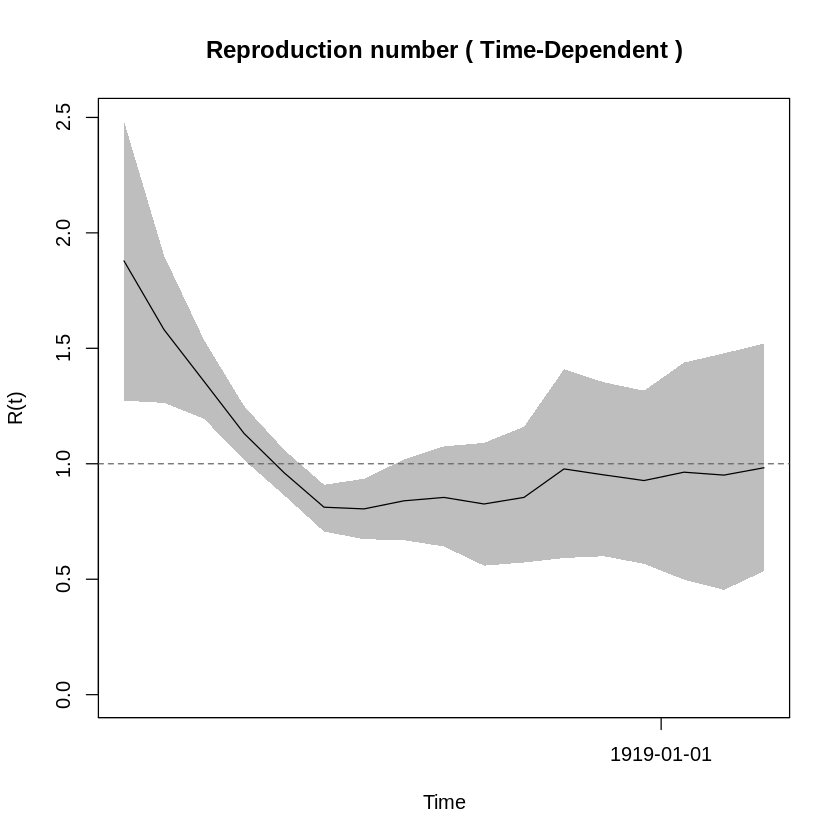

In [74]:
example(est.R0.TD)

In [75]:
mGT <- generation.time("gamma", c(3,1.5))
SB <- est.R0.SB(Germany.1918, mGT, begin=1, end=100)
str(SB)

List of 14
 $ R          : num [1:99] 0 0 2.22 0.66 1.2 1.84 1.43 1.63 1.34 1.52 ...
 $ conf.int   :'data.frame':	99 obs. of  2 variables:
  ..$ CI.lower.: num [1:99] 0.01 0.01 0.97 0.05 0.31 1.11 0.8 1.1 0.85 1.09 ...
  ..$ CI.upper.: num [1:99] 1.62 1.59 3.26 1.63 2.02 2.49 2 2.13 1.79 1.93 ...
 $ proba.Rt   :List of 100
  ..$ : num [1:4601] 0.000217 0.000217 0.000217 0.000217 0.000217 ...
  ..$ : num [1:4601] 0.0152 0.0151 0.0149 0.0148 0.0146 ...
  ..$ : num [1:4601] 0.0136 0.0135 0.0134 0.0133 0.0132 ...
  ..$ : num [1:4601] 2.03e-05 2.13e-05 2.23e-05 2.33e-05 2.44e-05 ...
  ..$ : num [1:4601] 0.00419 0.00428 0.00437 0.00446 0.00455 ...
  ..$ : num [1:4601] 0.000359 0.000378 0.000397 0.000417 0.000438 ...
  ..$ : num [1:4601] 1.32e-07 1.48e-07 1.65e-07 1.85e-07 2.06e-07 ...
  ..$ : num [1:4601] 1.06e-06 1.19e-06 1.34e-06 1.52e-06 1.71e-06 ...
  ..$ : num [1:4601] 1.27e-09 1.53e-09 1.83e-09 2.19e-09 2.63e-09 ...
  ..$ : num [1:4601] 2.00e-08 2.41e-08 2.91e-08 3.51e-08 4.22e-08 ...


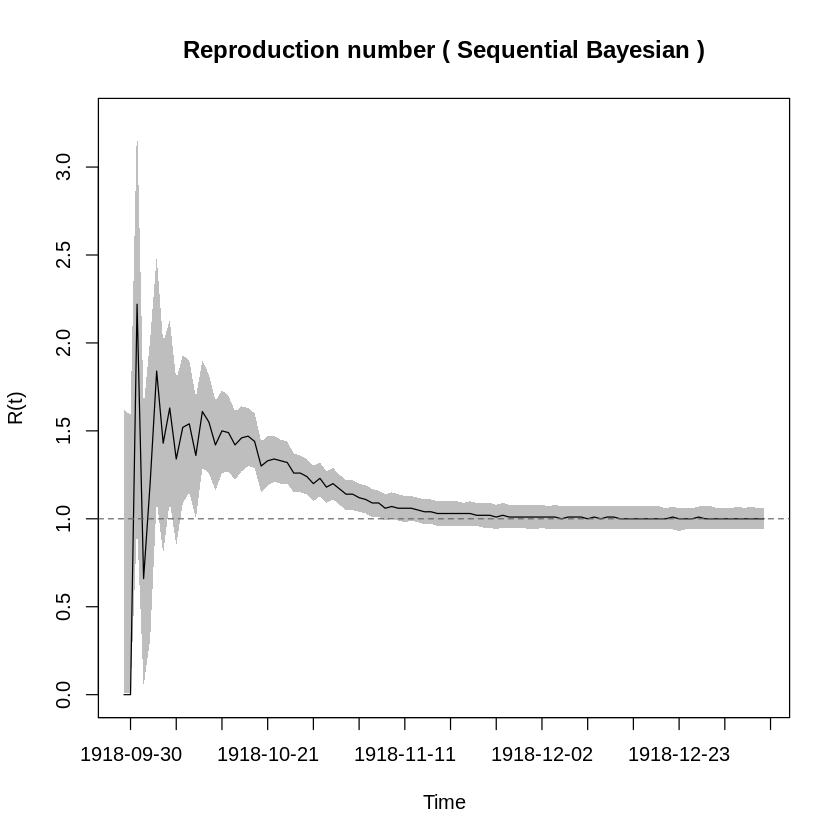

In [76]:
plot(SB)

### Now, let's estimate Rt to Covid19 for Tennessee

The mean generation time of Covid19 is estimated to 4-5 days. 

In [151]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 180 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)

,Tennessee,Georgia,Alabama,Florida,dates
,<dbl>,<dbl>,<dbl>,<dbl>,<date>
3/30/20,197,157,74,1227,2020-03-30
3/31/20,474,1121,88,1268,2020-03-31
4/1/20,542,709,73,215,2020-04-01
4/2/20,80,710,173,2052,2020-04-02
4/3/20,54,483,262,1260,2020-04-03
4/4/20,255,329,119,1269,2020-04-04


In [153]:
length(tb_sub[,1])

[1] 181

In [154]:
mGT<-generation.time("gamma", c(5, 1.5))
mGT

Discretized Generation Time distribution
mean: 4.999765 , sd: 1.526835 
 [1] 0.0000000000 0.0006003464 0.0240149896 0.1294177453 0.2495603758
 [6] 0.2599966046 0.1807711004 0.0946112317 0.0401491572 0.0145052741
[11] 0.0046144103 0.0013241718 0.0003489722 0.0000856206


In [155]:
TD <- est.R0.TD(tb_sub$Tennessee, mGT, begin=1, end=180, nsim=100)

Warning message in est.R0.TD(tb_sub$Tennessee, mGT, begin = 1, end = 180, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(tb_sub$Tennessee, mGT, begin = 1, end = 180, nsim = 100):
“Using initial incidence as initial number of cases.”


In [156]:
str(TD)

List of 16
 $ R          : Named num [1:180] 5.99 1.02 1 1.07 1.14 ...
  ..- attr(*, "names")= chr [1:180] "1" "2" "3" "4" ...
 $ conf.int   :'data.frame':	180 obs. of  2 variables:
  ..$ lower: num [1:180] 5.87 0.947 0.957 0.861 0.842 ...
  ..$ upper: num [1:180] 6.12 1.07 1.06 1.24 1.48 ...
 $ P          : num [1:181, 1:181] 0 0 0 0 0 0 0 0 0 0 ...
 $ p          : num [1:181, 1:181] 0 0 0 0 0 0 0 0 0 0 ...
 $ GT         :List of 4
  ..$ GT  : num [1:14] 0 0.0006 0.024 0.1294 0.2496 ...
  ..$ time: int [1:14] 0 1 2 3 4 5 6 7 8 9 ...
  ..$ mean: num 5
  ..$ sd  : num 1.53
  ..- attr(*, "class")= chr "R0.GT"
 $ epid       :List of 2
  ..$ incid: num [1:181] 197 474 542 80 54 255 311 169 337 224 ...
  ..$ t    : num [1:181] 1 2 3 4 5 6 7 8 9 10 ...
 $ import     : num [1:181] 0 0 0 0 0 0 0 0 0 0 ...
 $ pred       : num [1:180] 197 0.708 28.615 164.575 369.98 ...
 $ begin      : num 1
 $ begin.nb   : int 1
 $ end        : int [1:5] 18 25 53 65 92
 $ end.nb     : int 180
 $ data.name  : ch

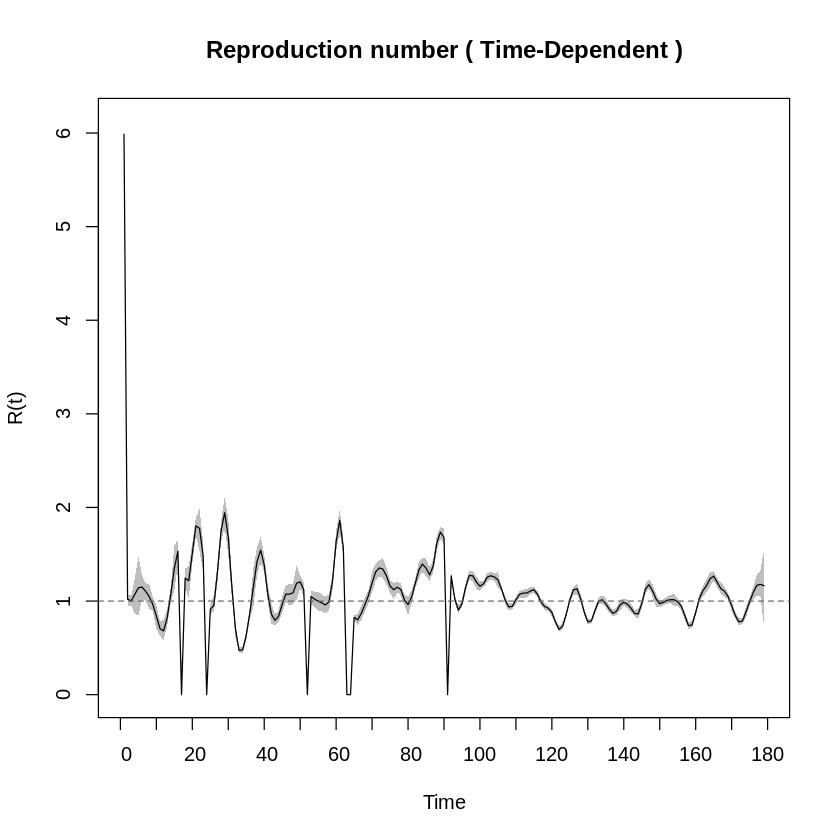

In [157]:
plot(TD)

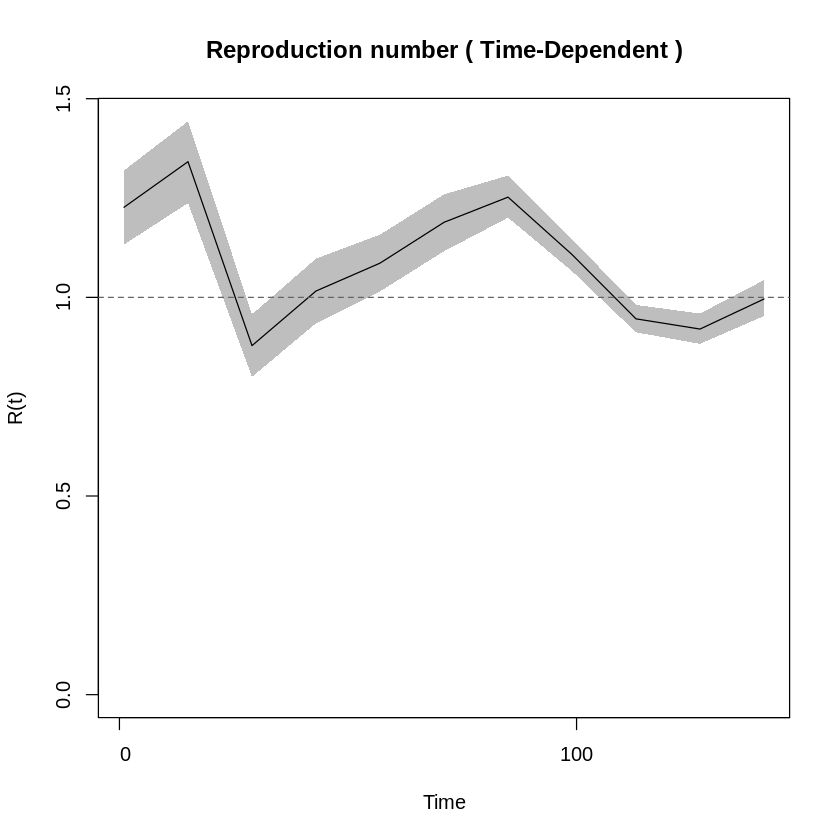

In [158]:
plot(smooth.Rt(TD,14))

In [159]:
SB <- est.R0.SB(epid= tb_sub$Tennessee, GT=mGT, begin=1, end=99) #Bayesian approach, but only calcular first 16 days
str(SB)

List of 14
 $ R          : num [1:16] 5.39 3.07 0.49 0.41 1.21 1.34 0.93 1.33 1.06 1.14 ...
 $ conf.int   :'data.frame':	16 obs. of  2 variables:
  ..$ CI.lower.: num [1:16] 4.93 2.76 0.19 0.13 0.95 1.1 0.7 1.12 0.86 0.95 ...
  ..$ CI.upper.: num [1:16] 5.83 3.38 0.78 0.7 1.47 1.58 1.15 1.53 1.25 1.32 ...
 $ proba.Rt   :List of 17
  ..$ : num [1:212501] 4.71e-06 4.71e-06 4.71e-06 4.71e-06 4.71e-06 ...
  ..$ : num [1:212501] 1.36e-88 2.54e-88 4.75e-88 8.86e-88 1.65e-87 ...
  ..$ : num [1:212501] 5.71e-71 1.45e-70 3.67e-70 9.29e-70 2.34e-69 ...
  ..$ : num [1:212501] 0.000153 0.000187 0.000228 0.000278 0.000337 ...
  ..$ : num [1:212501] 0.000585 0.000701 0.000837 0.000994 0.001175 ...
  ..$ : num [1:212501] 8.80e-19 1.61e-18 2.92e-18 5.29e-18 9.53e-18 ...
  ..$ : num [1:212501] 7.29e-27 1.63e-26 3.64e-26 8.06e-26 1.78e-25 ...
  ..$ : num [1:212501] 2.09e-15 3.93e-15 7.37e-15 1.37e-14 2.54e-14 ...
  ..$ : num [1:212501] 3.00e-33 8.41e-33 2.34e-32 6.48e-32 1.78e-31 ...
  ..$ : num [1:2125

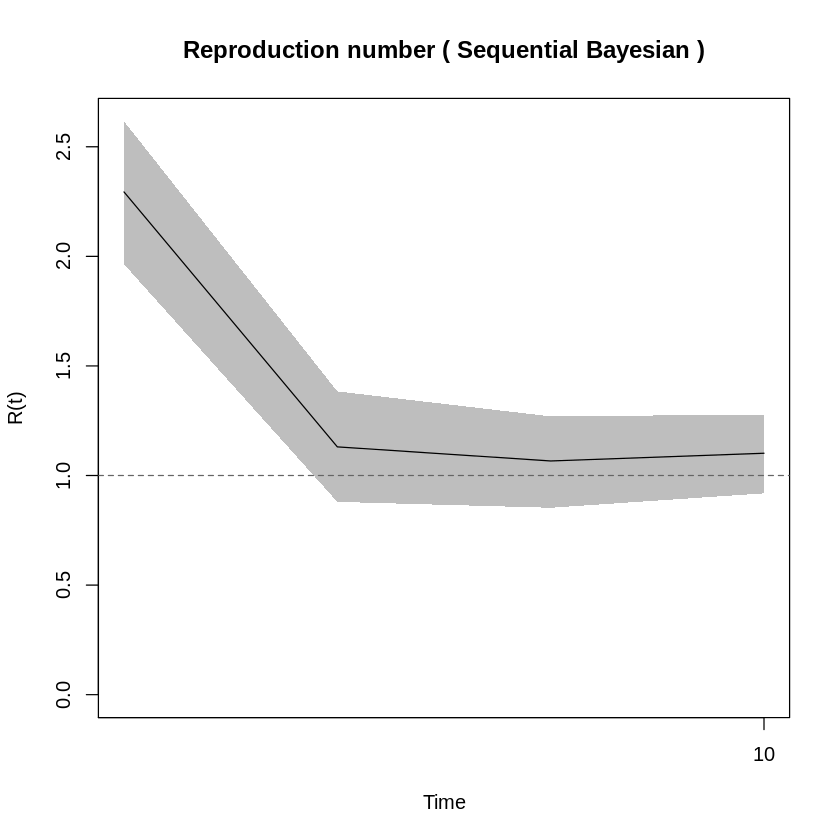

In [160]:
plot(smooth.Rt(SB, 3))

## How about Hamilton County, TN? 

In [161]:
install.packages('R0')
library('R0')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [162]:
library(tidyverse)
library(lubridate)
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))

tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))

names(tb1) = tb$Combined_Key

current_dates = names(tb)[12:length(tb[1,])]
tb1$dates = mdy(current_dates)

Parsed with column specification:
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)

See spec(...) for full column specifications.



### Select Hamilton, Tennessee, US

In [163]:
names(tb1) [grep(  "Tennessee", names(tb1))]

[1] "Anderson, Tennessee, US"   "Bedford, Tennessee, US"   
 [3] "Benton, Tennessee, US"     "Bledsoe, Tennessee, US"   
 [5] "Blount, Tennessee, US"     "Bradley, Tennessee, US"   
 [7] "Campbell, Tennessee, US"   "Cannon, Tennessee, US"    
 [9] "Carroll, Tennessee, US"    "Carter, Tennessee, US"    
[11] "Cheatham, Tennessee, US"   "Chester, Tennessee, US"   
[13] "Claiborne, Tennessee, US"  "Clay, Tennessee, US"      
[15] "Cocke, Tennessee, US"      "Coffee, Tennessee, US"    
[17] "Crockett, Tennessee, US"   "Cumberland, Tennessee, US"
[19] "Davidson, Tennessee, US"   "DeKalb,Tennessee,US"      
[21] "Decatur, Tennessee, US"    "Dickson, Tennessee, US"   
[23] "Dyer, Tennessee, US"       "Fayette, Tennessee, US"   
[25] "Fentress, Tennessee, US"   "Franklin, Tennessee, US"  
[27] "Gibson, Tennessee, US"     "Giles, Tennessee, US"     
[29] "Grainger, Tennessee, US"   "Greene, Tennessee, US"    
[31] "Grundy, Tennessee, US"     "Hamblen, Tennessee, US"   
[33] "Hamilton, Tennessee, US"   "Hancock, Tennessee, US"   
[35] "Hardeman, Tennessee, US"   "Hardin, Tennessee, US"    
[37] "Hawkins, Tennessee, US"    "Haywood, Tennessee, US"   
[39] "Henderson, Tennessee, US"  "Henry, Tennessee, US"     
[41] "Hickman, Tennessee, US"    "Houston, Tennessee, US"   
[43] "Humphreys, Tennessee, US"  "Jackson, Tennessee, US"   
[45] "Jefferson, Tennessee, US"  "Johnson, Tennessee, US"   
[47] "Knox, Tennessee, US"       "Lake, Tennessee, US"      
[49] "Lauderdale, Tennessee, US" "Lawrence, Tennessee, US"  
[51] "Lewis, Tennessee, US"      "Lincoln, Tennessee, US"   
[53] "Loudon, Tennessee, US"     "Macon, Tennessee, US"     
[55] "Madison, Tennessee, US"    "Marion, Tennessee, US"    
[57] "Marshall, Tennessee, US"   "Maury, Tennessee, US"     
[59] "McMinn, Tennessee, US"     "McNairy, Tennessee, US"   
[61] "Meigs, Tennessee, US"      "Monroe, Tennessee, US"    
[63] "Montgomery, Tennessee, US" "Moore, Tennessee, US"     
[65] "Morgan, Tennessee, US"     "Obion, Tennessee, US"     
[67] "Out of TN, Tennessee, US"  "Overton, Tennessee, US"   
[69] "Perry, Tennessee, US"      "Pickett, Tennessee, US"   
[71] "Polk, Tennessee, US"       "Putnam, Tennessee, US"    
[73] "Rhea, Tennessee, US"       "Roane, Tennessee, US"     
[75] "Robertson, Tennessee, US"  "Rutherford, Tennessee, US"
[77] "Scott, Tennessee, US"      "Sequatchie, Tennessee, US"
[79] "Sevier, Tennessee, US"     "Shelby, Tennessee, US"    
[81] "Smith, Tennessee, US"      "Stewart, Tennessee, US"   
[83] "Sullivan, Tennessee, US"   "Sumner, Tennessee, US"    
[85] "Tipton, Tennessee, US"     "Trousdale, Tennessee, US" 
[87] "Unassigned, Tennessee, US" "Unicoi, Tennessee, US"    
[89] "Union, Tennessee, US"      "Van Buren, Tennessee, US" 
[91] "Warren, Tennessee, US"     "Washington, Tennessee, US"
[93] "Wayne, Tennessee, US"      "Weakley, Tennessee, US"   
[95] "White, Tennessee, US"      "Williamson, Tennessee, US"
[97] "Wilson, Tennessee, US"

In [194]:
window = 190

tb_sub <-  tb1 %>% 
  dplyr::select ( c('Hamilton, Tennessee, US', 'Davidson, Tennessee, US', 'dates')) %>%
  dplyr::filter( between(dates, today(tzone='EST') - window,  today(tzone ='EST')))

str(tb_sub)

'data.frame':	190 obs. of  3 variables:
 $ Hamilton, Tennessee, US: num  7 8 12 8 26 30 30 35 35 35 ...
 $ Davidson, Tennessee, US: num  140 167 164 253 257 293 312 376 394 443 ...
 $ dates                  : Date, format: "2020-03-21" "2020-03-22" ...


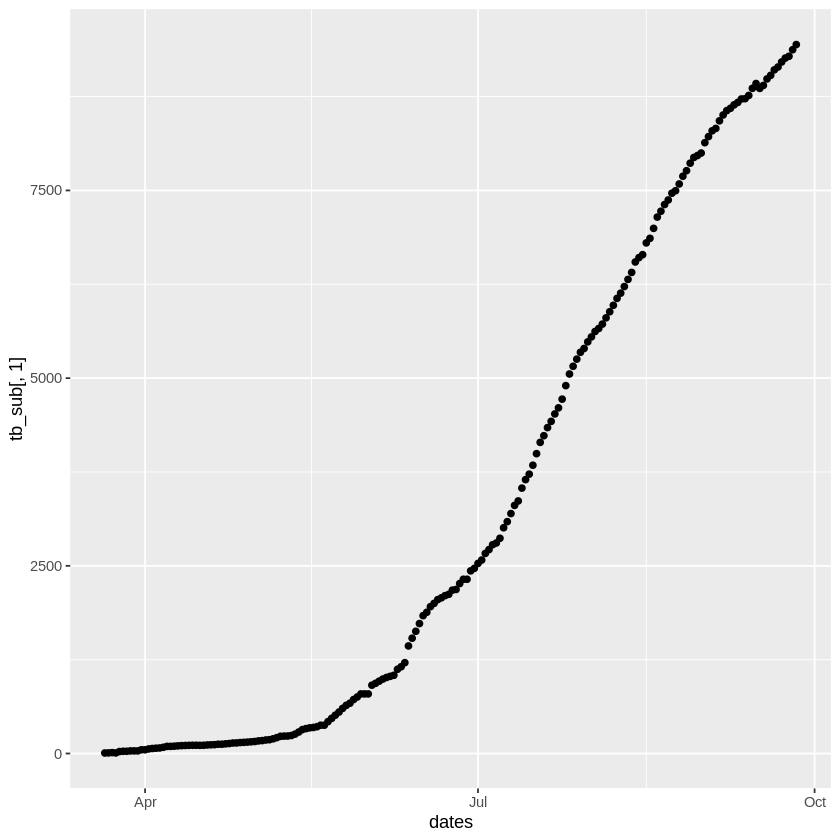

In [195]:
ggplot(tb_sub, aes(x=dates, y=tb_sub[,1])) + geom_point()

In [196]:
head(tb_sub)

,"Hamilton, Tennessee, US","Davidson, Tennessee, US",dates
,<dbl>,<dbl>,<date>
3/21/20,7,140,2020-03-21
3/22/20,8,167,2020-03-22
3/23/20,12,164,2020-03-23
3/24/20,8,253,2020-03-24
3/25/20,26,257,2020-03-25
3/26/20,30,293,2020-03-26


### Estiamte daily cases

March 31 Tuesday has 15 cases, but Sunday and Monday has zero cases. 

Hong will try to spead the spike daily counts into previous days with zeros. 

In [197]:
tb_daily_sub = data.frame( apply(tb_sub[,1:2], 2, diff) )
head(tb_daily_sub, n=15)

,Hamilton..Tennessee..US,Davidson..Tennessee..US
,<dbl>,<dbl>
3/22/20,1,27
3/23/20,4,-3
3/24/20,-4,89
3/25/20,18,4
3/26/20,4,36
3/27/20,0,19
3/28/20,5,64
3/29/20,0,18
3/30/20,0,49


In [198]:
wday(mdy('3/31/20'))

[1] 3

In [199]:
tb_daily_sub[c('3/20/20', '3/21/20'), 1] = c(1,1)
tb_daily_sub[c('3/24/20', '3/25/20'), 1] = c(7, 7)
tb_daily_sub[c('3/29/20', '3/30/20', '3/30/20'), 1] = c(5, 5, 5)

### Estimate Rt for Hamilton, TN

In [200]:
mGT<-generation.time("gamma", c(5, 1.5))
x = tb_daily_sub[,1]
x[x<0]= 0
length(x)

[1] 191

In [201]:
start = 1
stop = length(x)-1 # Rt estimation need a few day, try 5 days

TD<- est.R0.TD(x, mGT, begin= start, end= stop, nsim=100) 

Warning message in est.R0.TD(x, mGT, begin = start, end = stop, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(x, mGT, begin = start, end = stop, nsim = 100):
“Using initial incidence as initial number of cases.”


In [202]:
tb_daily_sub$RtHamilton =  c( TD$R, rep(NA, 1))

In [203]:
head(tb_daily_sub)

,Hamilton..Tennessee..US,Davidson..Tennessee..US,RtHamilton
,<dbl>,<dbl>,<dbl>
3/22/20,1,27,15.797344
3/23/20,4,-3,2.223247
3/24/20,7,89,1.300687
3/25/20,7,4,1.514984
3/26/20,4,36,1.723728
3/27/20,0,19,0.000000


In [204]:
tail(tb_daily_sub)

,Hamilton..Tennessee..US,Davidson..Tennessee..US,RtHamilton
,<dbl>,<dbl>,<dbl>
9/23/20,52,107,0.31093473
9/24/20,24,58,0.09368752
9/25/20,87,129,0.02385884
9/26/20,69,93,0.01914621
3/20/20,1,NA,0.01915138
3/21/20,1,NA,NA


In [205]:
number_of_rows = length(tb_daily_sub[,1 ])
tb_daily_sub$RtHamilton[ (number_of_rows-5) :number_of_rows] = NA

In [206]:
# add dates
list_of_dates = row.names( tb_daily_sub)
tb_daily_sub$dates = mdy( list_of_dates )

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 17 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


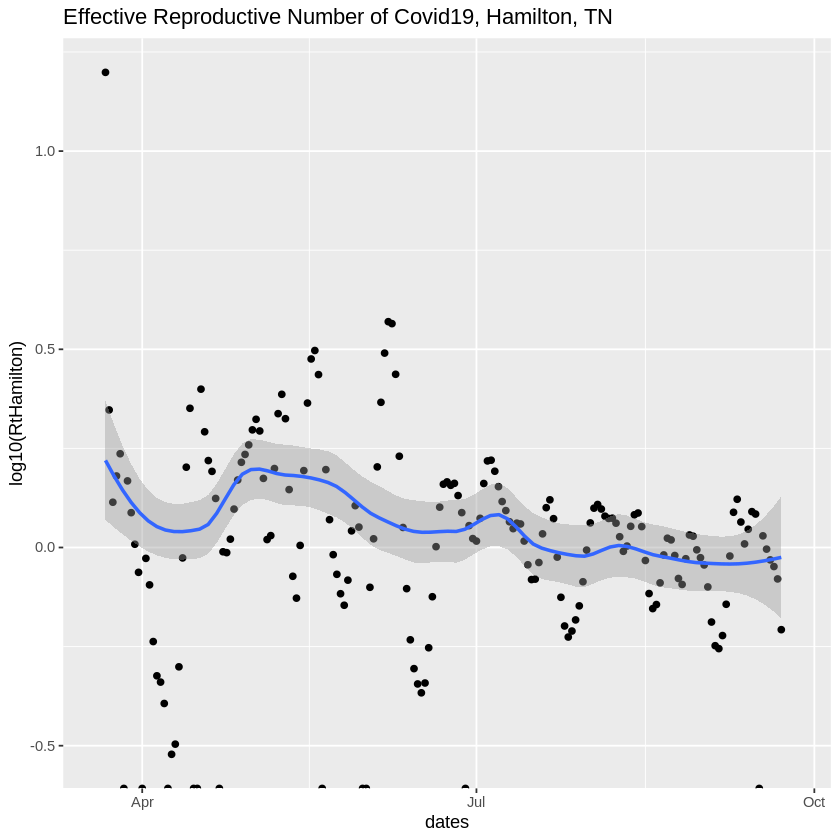

In [207]:
ggplot(tb_daily_sub, aes(x=dates, y=log10(RtHamilton)) ) +
  geom_point() +
  stat_smooth(span=0.4) +
  ggtitle("Effective Reproductive Number of Covid19, Hamilton, TN")

### Can we remove some noises in Rt? 

In [208]:
tb_daily_sub$index = 1: length( tb_daily_sub[,1]) 

loessSpan04 = loess( RtHamilton ~ index, data=tb_daily_sub, span=0.4 )

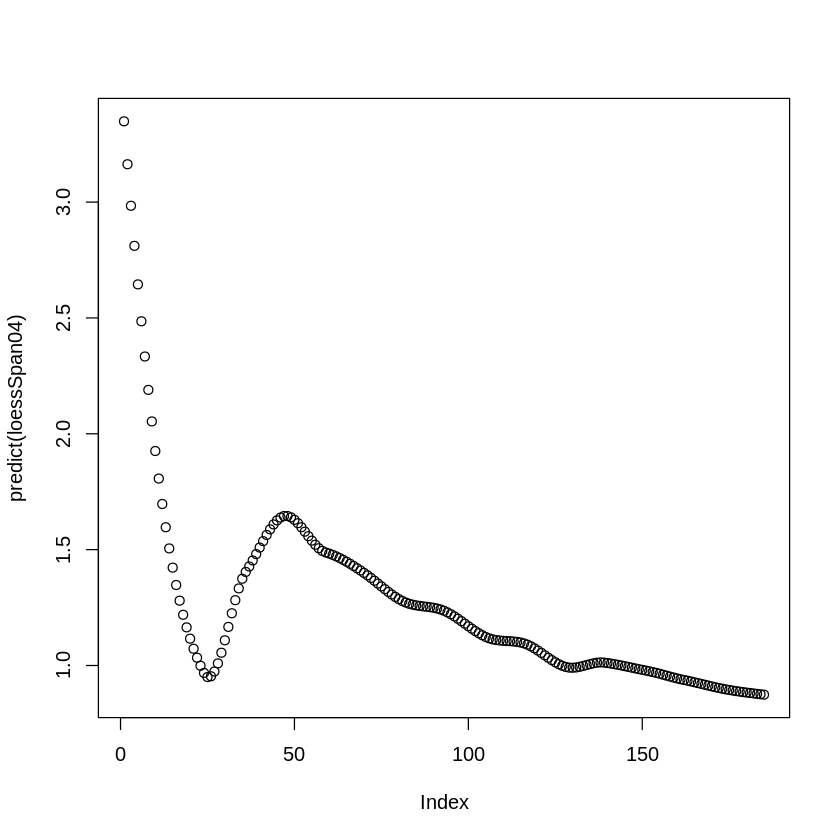

In [209]:
plot( predict( loessSpan04))

In [211]:
#str(loessSpan04)

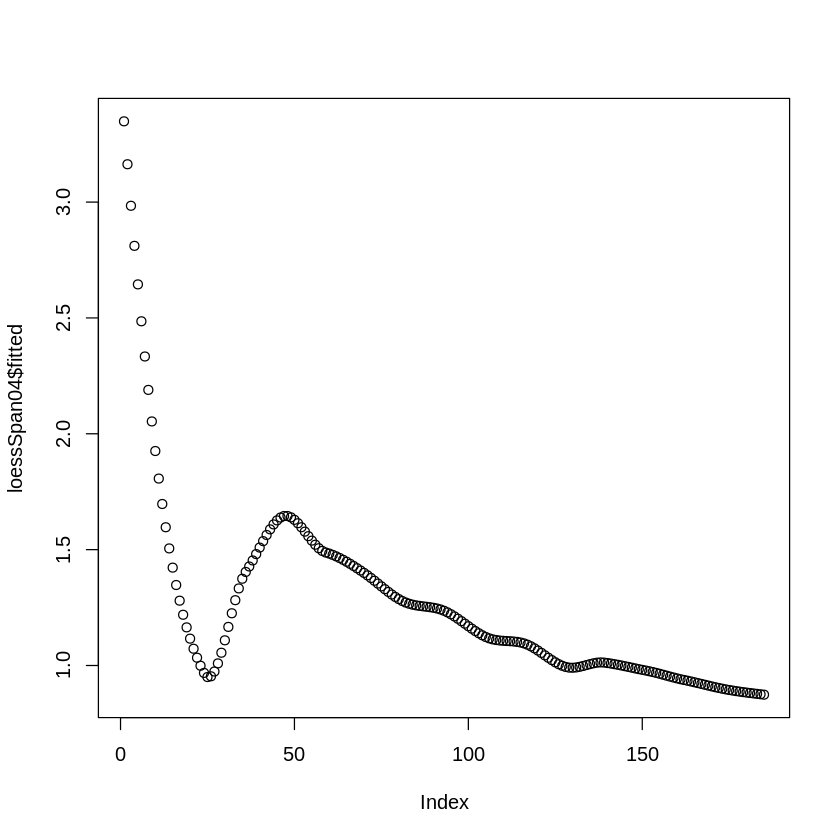

In [212]:
plot(loessSpan04$fitted)

# Part 4. Canada Covid19 data analysis

### pre-process

In [213]:
library(tidyverse)
library(lubridate)
# load JHU covid19 data set with tidyverse read_csv
gtb = read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

head(gtb)

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.



Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,⋯,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Afghanistan,33.93911,67.70995,0,0,0,0,0,0,⋯,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192
NA,Albania,41.15330,20.16830,0,0,0,0,0,0,⋯,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153
NA,Algeria,28.03390,1.65960,0,0,0,0,0,0,⋯,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914
NA,Andorra,42.50630,1.52180,0,0,0,0,0,0,⋯,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836
NA,Angola,-11.20270,17.87390,0,0,0,0,0,0,⋯,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672
NA,Antigua and Barbuda,17.06080,-61.79640,0,0,0,0,0,0,⋯,95,95,96,96,96,96,97,97,98,98


In [214]:
names(gtb)[1:2] = c("Province", "Country")
head(gtb)

Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,⋯,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Afghanistan,33.93911,67.70995,0,0,0,0,0,0,⋯,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192
NA,Albania,41.15330,20.16830,0,0,0,0,0,0,⋯,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153
NA,Algeria,28.03390,1.65960,0,0,0,0,0,0,⋯,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914
NA,Andorra,42.50630,1.52180,0,0,0,0,0,0,⋯,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836
NA,Angola,-11.20270,17.87390,0,0,0,0,0,0,⋯,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672
NA,Antigua and Barbuda,17.06080,-61.79640,0,0,0,0,0,0,⋯,95,95,96,96,96,96,97,97,98,98


In [215]:
ctb <- gtb %>% 
 filter( gtb$Country == 'Canada')

head(ctb)

Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,⋯,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,⋯,16274,16381,16381,16381,16739,16889,17032,17190,17343,17343
British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,⋯,7663,7842,7842,7842,8208,8304,8395,8395,8641,8641
Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Grand Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,⋯,13,13,13,13,13,13,13,13,13,13
Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,⋯,1500,1540,1558,1586,1608,1632,1674,1711,1764,1829
New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,⋯,194,194,194,194,196,196,197,199,200,200


In [216]:
ctb1 <- ctb %>% dplyr::select(5:length(ctb[1,])) %>% as.matrix()
ctb1 = as.data.frame(t(ctb1))
head(ctb1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [217]:
names(ctb1) = ctb$Province
ctb1 = ctb1[ -c(1:50), ] #remove first 50 rows with very low numbers
head(ctb1)

,Alberta,British Columbia,Diamond Princess,Grand Princess,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3/12/20,19,46,0,0,0,1,0,0,0,42,0,9,0,0
3/13/20,29,64,0,2,4,1,0,0,0,74,0,17,2,0
3/14/20,29,64,0,2,4,1,0,0,0,79,0,17,2,0
3/15/20,39,73,0,2,4,2,1,0,0,104,1,24,2,0
3/16/20,56,103,0,2,7,6,1,0,5,177,1,50,7,0
3/17/20,74,103,0,8,8,8,3,0,7,185,1,74,7,0


## Convert cumulative values into daily new cases

In [218]:
ctb2 = data.frame(apply(ctb1, 2, diff))
head(ctb2)

,Alberta,British.Columbia,Diamond.Princess,Grand.Princess,Manitoba,New.Brunswick,Newfoundland.and.Labrador,Northwest.Territories,Nova.Scotia,Ontario,Prince.Edward.Island,Quebec,Saskatchewan,Yukon
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3/13/20,10,18,0,2,4,0,0,0,0,32,0,8,2,0
3/14/20,0,0,0,0,0,0,0,0,0,5,0,0,0,0
3/15/20,10,9,0,0,0,1,1,0,0,25,1,7,0,0
3/16/20,17,30,0,0,3,4,0,0,5,73,0,26,5,0
3/17/20,18,0,0,6,1,2,2,0,2,8,0,24,0,0
3/18/20,23,83,0,1,7,3,0,0,5,36,0,20,1,0


In [219]:
current_dates = row.names(ctb2)
ctb2$dates = mdy(current_dates)
head(ctb2)

,Alberta,British.Columbia,Diamond.Princess,Grand.Princess,Manitoba,New.Brunswick,Newfoundland.and.Labrador,Northwest.Territories,Nova.Scotia,Ontario,Prince.Edward.Island,Quebec,Saskatchewan,Yukon,dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
3/13/20,10,18,0,2,4,0,0,0,0,32,0,8,2,0,2020-03-13
3/14/20,0,0,0,0,0,0,0,0,0,5,0,0,0,0,2020-03-14
3/15/20,10,9,0,0,0,1,1,0,0,25,1,7,0,0,2020-03-15
3/16/20,17,30,0,0,3,4,0,0,5,73,0,26,5,0,2020-03-16
3/17/20,18,0,0,6,1,2,2,0,2,8,0,24,0,0,2020-03-17
3/18/20,23,83,0,1,7,3,0,0,5,36,0,20,1,0,2020-03-18


In [220]:
#myprovinces = c('Alberta','British.Columbia', 'Ontario')
myprovinces = c('Alberta','Ontario')

days_window = 150 # time window
endday = today(tzone = 'EST') -1

tb_sub <- ctb2 %>% 
  dplyr::select( all_of(myprovinces), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

tail(tb_sub)

,Alberta,Ontario,dates
,<dbl>,<dbl>,<date>
9/21/20,358,492,2020-09-21
9/22/20,150,502,2020-09-22
9/23/20,143,329,2020-09-23
9/24/20,158,364,2020-09-24
9/25/20,153,529,2020-09-25
9/26/20,0,273,2020-09-26


In [221]:
install.packages('reshape2')
library(reshape2)
df_tmp <- reshape2::melt(tb_sub, measure.vars = myprovinces, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,dates,State,DailyCases
,<date>,<fct>,<dbl>
1,2020-04-29,Alberta,315
2,2020-04-30,Alberta,190
3,2020-05-01,Alberta,218
4,2020-05-02,Alberta,97
5,2020-05-03,Alberta,96
6,2020-05-04,Alberta,70


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



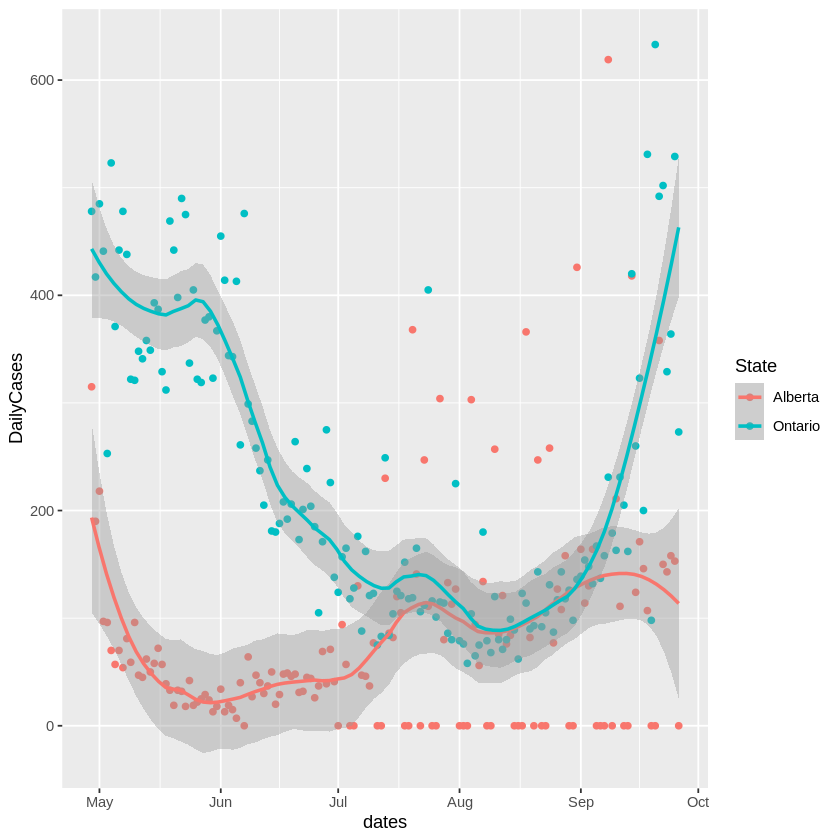

In [222]:
ggplot(df_tmp, aes(x=dates, y=DailyCases,color=State)) + geom_point() + stat_smooth(span=0.3)

## Estimate Rt

In [223]:
install.packages('R0')
library('R0')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [118]:
str(tb_sub)

'data.frame':	151 obs. of  3 variables:
 $ Alberta: num  315 190 218 97 96 70 57 70 54 81 ...
 $ Ontario: num  478 417 485 441 253 523 371 442 478 438 ...
 $ dates  : Date, format: "2020-04-29" "2020-04-30" ...


In [119]:
mGT<-generation.time("gamma", c(5, 1.5))
tmp = tb_sub[,2] #Ontario
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtOntario = TD$R


Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Using initial incidence as initial number of cases.”


In [120]:
tmp = tb_sub[,1] #Alberta
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtAlberta = TD$R


Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Using initial incidence as initial number of cases.”


In [121]:
tail(tb_sub)

,Alberta,Ontario,dates,RtOntario,RtAlberta
,<dbl>,<dbl>,<date>,<dbl>,<dbl>
9/21/20,358,492,2020-09-21,0.9012189,0.82338319
9/22/20,150,502,2020-09-22,0.8106799,0.47464035
9/23/20,143,329,2020-09-23,0.6941971,0.18744875
9/24/20,158,364,2020-09-24,0.6148148,0.02829589
9/25/20,153,529,2020-09-25,0.6003291,0.00000000
9/26/20,0,273,2020-09-26,0.0000000,0.00000000


In [122]:
df_tmp <- reshape2::melt(tb_sub[, 3:5], measure.vars = c("RtOntario", "RtAlberta"), value.name = 'Rt', variable.name = 'Rt_by_State')
df_tmp$Rt[ df_tmp$Rt==0] = NA
tail(df_tmp)


,dates,Rt_by_State,Rt
,<date>,<fct>,<dbl>
297,2020-09-21,RtAlberta,0.82338319
298,2020-09-22,RtAlberta,0.47464035
299,2020-09-23,RtAlberta,0.18744875
300,2020-09-24,RtAlberta,0.02829589
301,2020-09-25,RtAlberta,NA
302,2020-09-26,RtAlberta,NA


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 35 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 35 rows containing missing values (geom_point).”


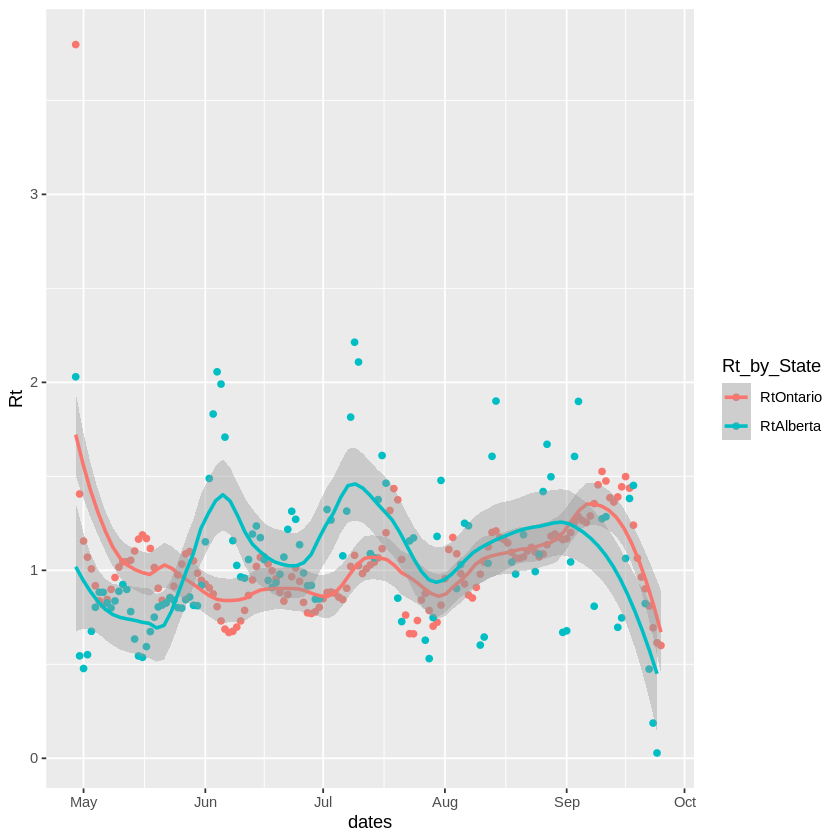

In [123]:
ggplot(df_tmp, aes(x=dates, y=Rt, color=Rt_by_State) ) +
  geom_point() +
  stat_smooth(span=0.3)

# Part 5. In progress. Mobility analysis


In [125]:
library(tidyverse)

# read directly from url
tbGM = read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

Parsed with column specification:
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_logical(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)

Warning message:
“2699993 parsing failures.
 row        col           expected                  actual                                                                  file
1936 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
1937 me

In [127]:
# get Google Mobility data through wget
system( 'wget https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

In [128]:
list.files()

[1] "Global_Mobility_Report.csv" "R0"                        
[3] "sample_data"

In [129]:
tbGM = read_csv('Global_Mobility_Report.csv')
head(tbGM)

Parsed with column specification:
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_logical(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)

Warning message:
“2699993 parsing failures.
 row        col           expected                  actual                         file
1936 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'Global_Mobility_Report.csv'
1937 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'Global_Mobility_Report.csv'
1

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-15,0,4,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-16,1,4,4,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-17,-1,1,5,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-18,-2,1,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-19,-2,0,4,-1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-20,-2,1,6,1,1,1


In [130]:
tbGM %>% 
 distinct( country_region)

country_region
<chr>
United Arab Emirates
Afghanistan
Antigua and Barbuda
Angola
Argentina
Austria
Australia
Aruba
Bosnia and Herzegovina


In [131]:
tbGM %>% filter( country_region == "United States")


country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
US,United States,NA,NA,NA,NA,NA,2020-02-15,6,2,15,3,2,-1
US,United States,NA,NA,NA,NA,NA,2020-02-16,7,1,16,2,0,-1
US,United States,NA,NA,NA,NA,NA,2020-02-17,6,0,28,-9,-24,5
US,United States,NA,NA,NA,NA,NA,2020-02-18,0,-1,6,1,0,1
US,United States,NA,NA,NA,NA,NA,2020-02-19,2,0,8,1,1,0
US,United States,NA,NA,NA,NA,NA,2020-02-20,1,0,4,0,0,1
US,United States,NA,NA,NA,NA,NA,2020-02-21,2,-2,4,1,0,0
US,United States,NA,NA,NA,NA,NA,2020-02-22,7,3,23,5,4,-1
US,United States,NA,NA,NA,NA,NA,2020-02-23,7,3,23,5,2,-1


# Sandbox

In [133]:
x <- runif(12,1,1.5)
y <- runif(12,1,1.5)
z <- runif(12,1,1.5)
m <- letters[1:12]
df <- data.frame(x,y,z,m)


In [134]:
#library(tidyverse)
#install.packages('reshape2')
library(reshape2)
library(ggplot2)
#when you melt essentially you create only one column with the value
#and one column with the variable i.e. your x,y,z 
df <- melt(df, id.vars='m')
head(df)

,m,variable,value
,<fct>,<fct>,<dbl>
1,a,x,1.352522
2,b,x,1.425512
3,c,x,1.077522
4,d,x,1.253793
5,e,x,1.462105
6,f,x,1.274028


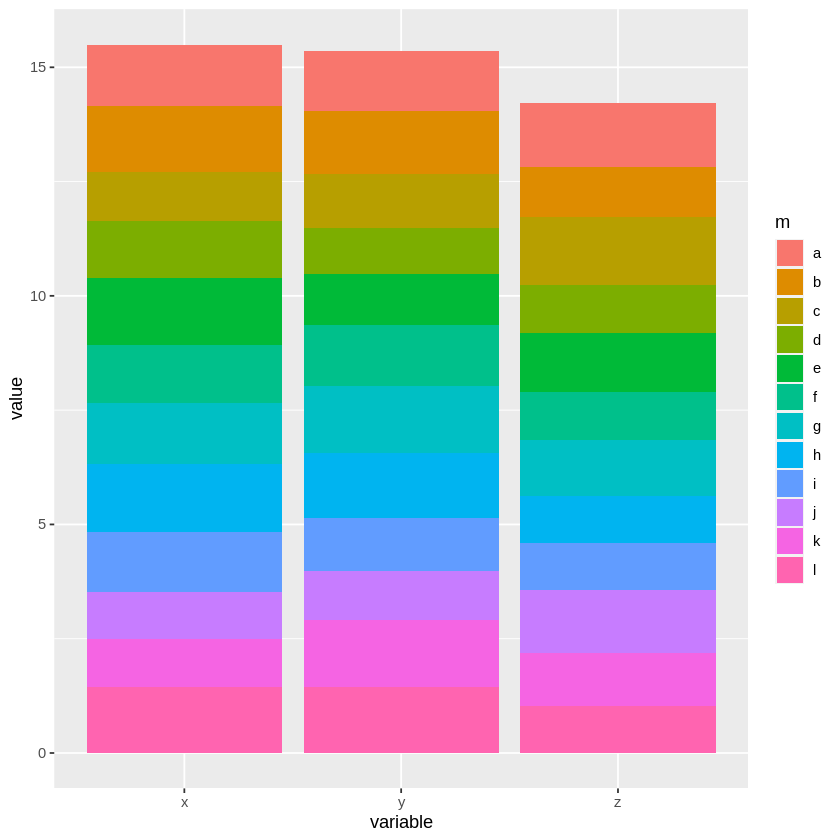

In [135]:
ggplot(df, aes(x=variable, y=value, fill=m)) + geom_bar(stat = 'identity')

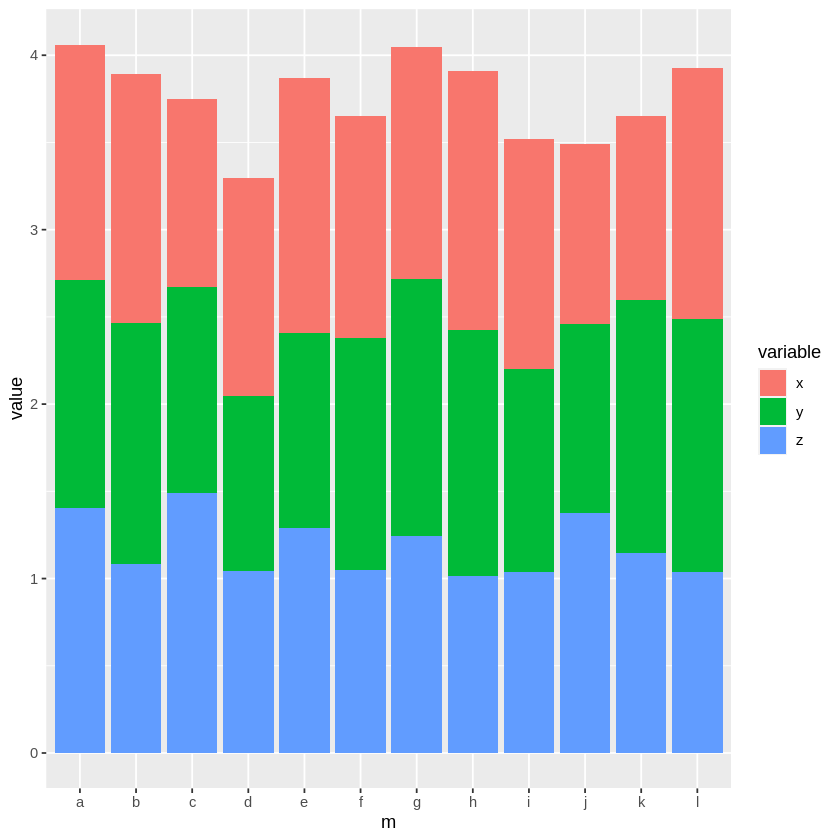

In [136]:
#ggplot it. x axis will be m, y will be the value and fill will be
#essentially your x,y,z

ggplot(df, aes(x=m, y=value, fill=variable)) + geom_bar(stat='identity')